<font color=blue>
Supriya Raman & Dharvi Kumra <br>
24th February, 2020
    </font>

# <font color=navy><u>Telecom Churn Case Study</font>
***
#### <font color=navy> Problem Statement: </font> <br>
<font color=brown>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
</font>

#### <font color=navy> Business Goal: </font> <br>
<font color=brown>
The below model is developed to help a leading telecom firm: 
- To identify customers at high risk of churn and 
- To identify the main indicators of churn.
- This project is based on the Indian and Southeast Asian market
- Churn Phases
    - In ‘Good’ phase the customer is happy with the service and behaves as usual
    - In ‘Action’ phase The customer experience starts to sore in this phase
    - In ‘Churn’ phase the customer is said to have churned

In [1282]:
## PREREQUISITE := install imblearn 
# conda install -c conda-forge imbalanced-learn

## Table of Contents 
<a> Pre-Step: Changing path of data file </a> <br>
<a> Step 0: Importing Libraries </a> <br>
<a> Step 1: Reading and Understanding the Data </a> <br>
<a> Step 2: Data Cleaning and Preparation </a> <br>
<a> Step 3: Filter High Value Customers </a> <br>
<a> Step 4: Tag Churners </a> <br>
<a> Step 5: Exploratory Data Analysis </a> <br>
<a> Step 6: Model Building For Prediction </a> <br>
<a> Step 7: Model Building For Identifying Important Features </a> <br>

## Pre-Step : Changing path of data file <a id='Pre-Step'></a>
<font color=navy>
Before executing the code in this sheet, please changing the path of csv file which stores the Telecom_Churn_Data

## Step 0: Importing Libraries <a id='Step 0'></a>
<font color=navy>
Importing all required Python Libraries

In [1283]:
# Importing Python Libraries
import numpy as np 
import pandas as pd 

# Libraries for Graphs and Plots
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.options.mode.chained_assignment = None

## Step 1: Reading and Understanding the Data <a id='Step 1'></a>
<font color=navy> 
Read the data from the file and inspect its various aspects like shape, missing data, numerical attributes etc.
<font color=brown> <u>
Read the data from the file

In [1284]:
# Read data from file
telecom_cust = pd.read_csv('telecom_churn_data.csv', encoding = "ISO-8859-1", low_memory=False)

In [1285]:
pd.options.display.max_columns = 226

In [1286]:
# Check the head of the dataset
telecom_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

<font color=brown>
<u> <1> Dropping fields with no significance for data modelling

In [1287]:
## First few columns seem to have all nulls or only one value as unique let's analyse :-

In [1288]:
print('unique_value_count => ',telecom_cust['mobile_number'].nunique())
print('unique_values => ',telecom_cust['mobile_number'].unique())

unique_value_count =>  99999
unique_values =>  [7000842753 7001865778 7001625959 ... 7000087541 7000498689 7001905007]


In [1289]:
## We can use mobile_number as unique id for each customer

In [1290]:
only_zeros = []
for each_col in list(telecom_cust.columns):
    if telecom_cust[each_col].nunique() == 1 and telecom_cust[each_col].all() == 0:
        print(each_col,' => unique_value_count => ',telecom_cust[each_col].nunique())
        print(each_col,' => unique_values => ',telecom_cust[each_col].unique())
        only_zeros.append(each_col)
print("Only Zero Valued Cols => ",len(only_zeros))

## There are 11 cols with only zero as value so we can discard these

loc_og_t2o_mou  => unique_value_count =>  1
loc_og_t2o_mou  => unique_values =>  [ 0. nan]
std_og_t2o_mou  => unique_value_count =>  1
std_og_t2o_mou  => unique_values =>  [ 0. nan]
loc_ic_t2o_mou  => unique_value_count =>  1
loc_ic_t2o_mou  => unique_values =>  [ 0. nan]
std_og_t2c_mou_6  => unique_value_count =>  1
std_og_t2c_mou_6  => unique_values =>  [nan  0.]
std_og_t2c_mou_7  => unique_value_count =>  1
std_og_t2c_mou_7  => unique_values =>  [nan  0.]
std_og_t2c_mou_8  => unique_value_count =>  1
std_og_t2c_mou_8  => unique_values =>  [ 0. nan]
std_og_t2c_mou_9  => unique_value_count =>  1
std_og_t2c_mou_9  => unique_values =>  [nan  0.]
std_ic_t2o_mou_6  => unique_value_count =>  1
std_ic_t2o_mou_6  => unique_values =>  [nan  0.]
std_ic_t2o_mou_7  => unique_value_count =>  1
std_ic_t2o_mou_7  => unique_values =>  [nan  0.]
std_ic_t2o_mou_8  => unique_value_count =>  1
std_ic_t2o_mou_8  => unique_values =>  [ 0. nan]
std_ic_t2o_mou_9  => unique_value_count =>  1
std_ic_t2o_mou_9

In [1291]:
telecom_cust = telecom_cust.drop(only_zeros,axis=1)

In [1292]:
telecom_cust.shape

(99999, 215)

In [1293]:
telecom_cust.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7  \
0     7000842753        109            6/30/2014            7/31/2014   
1     7001865778        109            6/30/2014            7/31/2014   
2     7001625959        109            6/30/2014            7/31/2014   
3     7001204172        109            6/30/2014            7/31/2014   
4     7000142493        109            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0            8/31/2014            9/30/2014  197.385  214.816  213.803   
1            8/31/2014            9/30/2014   34.047  355.074  268.321   
2            8/31/2014            9/30/2014  167.690  189.058  210.226   
3            8/31/2014            9/30/2014  221.338  251.102  508.054   
4            8/31/2014            9/30/2014  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              

In [1294]:
telecom_cust['circle_id'].nunique()

1

In [1295]:
# ## We can discard this columns
telecom_cust = telecom_cust.drop('circle_id',axis=1)

In [1296]:
telecom_cust.shape

(99999, 214)

In [1297]:
telecom_cust.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753            6/30/2014            7/31/2014   
1     7001865778            6/30/2014            7/31/2014   
2     7001625959            6/30/2014            7/31/2014   
3     7001204172            6/30/2014            7/31/2014   
4     7000142493            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0            8/31/2014            9/30/2014  197.385  214.816  213.803   
1            8/31/2014            9/30/2014   34.047  355.074  268.321   
2            8/31/2014            9/30/2014  167.690  189.058  210.226   
3            8/31/2014            9/30/2014  221.338  251.102  508.054   
4            8/31/2014            9/30/2014  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4   

<hr>


## Step 2: Data Cleaning & Missing Value Imputation<a></a><font color=brown>
<u> Split the data into Categorical and non categorical

In [1298]:
## Categorical features 
categorical_features = []
non_categorical_features = []
for each_col in list(telecom_cust.columns):
    if telecom_cust[each_col].nunique() == 2:
        print(each_col,' => ', telecom_cust[each_col].unique())
        categorical_features.append(each_col)
    else:
        if each_col != 'mobile_number':
            non_categorical_features.append(each_col)

night_pck_user_6  =>  [ 0. nan  1.]
night_pck_user_7  =>  [ 0. nan  1.]
night_pck_user_8  =>  [ 0. nan  1.]
night_pck_user_9  =>  [nan  0.  1.]
fb_user_6  =>  [ 1. nan  0.]
fb_user_7  =>  [ 1. nan  0.]
fb_user_8  =>  [ 1. nan  0.]
fb_user_9  =>  [nan  1.  0.]


In [1299]:
## These are categorical variables because they only have 1 and 0 which specify whether a user belongs to that
## category or not

## fb_user_6_x => whether the customer spends most of data on sites like facebook 
## night_pck_user_x => whether the customer uses a night_pack for data or not => 

## Night_pack => It works on particular time span at which free internet
##access is allowed as per your recharge done for a required night pack.

## These features in relation to other data related features can explain whether a person consumes data more or not 

In [1300]:
## The have certain NaN values in each column so we can impute those with the mode of that column
for each_col in categorical_features:
    telecom_cust[each_col].fillna(telecom_cust[each_col].mode()[0], inplace=True)
    print(each_col," => ",telecom_cust[each_col].unique())

night_pck_user_6  =>  [0. 1.]
night_pck_user_7  =>  [0. 1.]
night_pck_user_8  =>  [0. 1.]
night_pck_user_9  =>  [0. 1.]
fb_user_6  =>  [1. 0.]
fb_user_7  =>  [1. 0.]
fb_user_8  =>  [1. 0.]
fb_user_9  =>  [1. 0.]


In [1301]:
telecom_cust.shape

(99999, 214)

In [1302]:
## Now we can work with non - categorical data
telecom_cust[non_categorical_features].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00       

In [1303]:
## there could be differnt data types of columns in this set so let's filter based on dtype
numeric_non_categoric_features = []
non_numeric_non_categoric_features = []
for each_col in non_categorical_features:
    if telecom_cust[each_col].dtype in ['float64','int64']:
        numeric_non_categoric_features.append(each_col)
    else:
        non_numeric_non_categoric_features.append(each_col)

In [1304]:
## We will first look at numeric_non_categoric_features 
telecom_cust[numeric_non_categoric_features].head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

In [1305]:
telecom_cust[numeric_non_categoric_features].isnull().sum()/len(telecom_cust)

arpu_6         0.00000
arpu_7         0.00000
arpu_8         0.00000
arpu_9         0.00000
onnet_mou_6    0.03937
                ...   
aon            0.00000
aug_vbc_3g     0.00000
jul_vbc_3g     0.00000
jun_vbc_3g     0.00000
sep_vbc_3g     0.00000
Length: 193, dtype: float64

###### ALL THESE VALUES CORRESPOND TO USER'S SERVICE USAGE SO IT IS POSSIBLE THAT THE PERSON WAS USING A PARTICULAR SERVICE
###### OR NOT USING THAT SERVICE SO WE CAN IMPUTE ALL THESE VALUES WITH ZEROS 

In [1306]:
# Imputing the remaining non-categorical fields with zero
for each_col in numeric_non_categoric_features:
    telecom_cust[each_col].fillna(0,inplace=True)
    telecom_cust[each_col].astype(float)

In [1307]:
telecom_cust[numeric_non_categoric_features].isnull().sum()/len(telecom_cust)

arpu_6         0.0
arpu_7         0.0
arpu_8         0.0
arpu_9         0.0
onnet_mou_6    0.0
              ... 
aon            0.0
aug_vbc_3g     0.0
jul_vbc_3g     0.0
jun_vbc_3g     0.0
sep_vbc_3g     0.0
Length: 193, dtype: float64

In [1308]:
telecom_cust[non_numeric_non_categoric_features].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [1309]:
## We can drop these date fields
telecom_cust = telecom_cust.drop(non_numeric_non_categoric_features,axis=1)

In [1310]:
telecom_cust.shape

(99999, 202)

In [1311]:
telecom_cust.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

<hr>

## STEP 3: FILTER HIGH VALUE CUSTOMERS

In [1312]:
telecom_cust['total_data_rech_6'] = telecom_cust['total_rech_data_6'] * telecom_cust['av_rech_amt_data_6']
telecom_cust['total_data_rech_7'] = telecom_cust['total_rech_data_7'] * telecom_cust['av_rech_amt_data_7']
telecom_cust['data_amount_6'] = telecom_cust['total_rech_amt_6'] + telecom_cust['total_data_rech_6']
telecom_cust['data_amount_7'] = telecom_cust['total_rech_amt_7'] + telecom_cust['total_data_rech_7']
telecom_cust['av_amt_data_6_7'] = (telecom_cust['data_amount_6'] + telecom_cust['data_amount_7'])/2

In [1313]:
## calculate 70th percentile 

percentile_70_th = telecom_cust['av_amt_data_6_7'].quantile(0.7)
print(percentile_70_th)

478.0


In [1314]:
telecom_cust = telecom_cust[telecom_cust['av_amt_data_6_7']>=percentile_70_th]

In [1315]:
telecom_cust.shape

(30001, 207)

#### SO WE HAVE APPROX 30K HVC
<hr>

## Step 4: Tag churners <a id='Step 4'></a>
<font color=navy>
We tag the churned customers (churn=1) based on the fourth month (September) data. Those customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
</font> <br> <br>
The attributes you need to use to tag churners are: 
    - total_ic_mou_9 (Total incoming min of usage for 9th month)
    - total_og_mou_9 (Total outgoing min of usage for 9th month)
    - vol_2g_mb_9    (Mobile internet usage volume (in MB) 2G for 9th month)
    - vol_3g_mb_9    (Mobile internet usage volume (in MB) 3G for 9th month)

In [1316]:
## WE HAVE TO LABEL EACH CUSTOMER AS 
# CHURN => 1
# NOT CHURN => 0

#COLS TO BE CONSIDERED => total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

telecom_cust['Churn'] = np.where((telecom_cust['total_ic_mou_9']==0) & (telecom_cust['total_og_mou_9']==0) & (telecom_cust['vol_2g_mb_9']==0 ) & (telecom_cust['vol_3g_mb_9']==0),1,0)
telecom_cust['Churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

<hr>

## Step 5: Exploratory Data Analysis <a id='Step 5'></a>
<font color=navy>
Exploring the dataframe to gain useful insights and identify significant atttributes
<font color=brown> <a id='Step 5.1'></a>
5.1 <u> Eliminating Attributes using Metadata and Business Logics <br> </u>
<font color= black> - Attributes related to Outgoing Calls 

In [1317]:
##DATA INSIGHTS
 
### OUTGOUNG CALLS

#total_og_mou_6 = loc_og_mou_6 + std_og_mou_6 + spl_og_mou_6 + isd_og_mou_6 + og_others_6
#total_og_mou_7 = loc_og_mou_7 + std_og_mou_7 + spl_og_mou_7 + isd_og_mou_7 + og_others_7
#total_og_mou_8 = loc_og_mou_8 + std_og_mou_8 + spl_og_mou_8 + isd_og_mou_8 + og_others_8
#total_og_mou_9 = loc_og_mou_9 + std_og_mou_9 + spl_og_mou_9 + isd_og_mou_9 + og_others_9

### WE WILL DISCARD TOTAL OF TOTALS FIRST
out_total_of_totals = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9']
telecom_cust = telecom_cust.drop(out_total_of_totals,axis=1)

In [1318]:
## NOW WE CAN DISCARD TOTALS 

#std_og_mou_6 =std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6+std_og_t2o_mou_6
#std_og_mou_7 =std_og_t2t_mou_7 + std_og_t2m_mou_7 + std_og_t2f_mou_7+std_og_t2o_mou_7
#std_og_mou_8 =std_og_t2t_mou_8 + std_og_t2m_mou_8 + std_og_t2f_mou_8+std_og_t2o_mou_8
#std_og_mou_9 =std_og_t2t_mou_9 + std_og_t2m_mou_9 + std_og_t2f_mou_9+std_og_t2o_mou_9

#loc_og_mou_6 =loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6 + loc_og_t2o_mou_6
#loc_og_mou_7 =loc_og_t2t_mou_7 + loc_og_t2m_mou_7 + loc_og_t2f_mou_7 + loc_og_t2o_mou_7
#loc_og_mou_8 =loc_og_t2t_mou_8 + loc_og_t2m_mou_8 + loc_og_t2f_mou_8 + loc_og_t2o_mou_8
#loc_og_mou_9 =loc_og_t2t_mou_9 + loc_og_t2m_mou_9 + loc_og_t2f_mou_9 + loc_og_t2o_mou_9

discard_cols_out_totals = ['loc_og_mou_6', 'loc_og_mou_7','loc_og_mou_8', 'loc_og_mou_9', 'std_og_mou_6','std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9']
telecom_cust = telecom_cust.drop(discard_cols_out_totals, axis=1)

In [1319]:
### INCOMING CALLS

### FIRST WE DISCARD TOTALS OF TOTALS

#total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + spl_ic_mou_6 + isd_ic_mou_6 + ic_others_6
#total_ic_mou_7 = loc_ic_mou_7 + std_ic_mou_7 + spl_ic_mou_7 + isd_ic_mou_7 + ic_others_7
#total_ic_mou_8 = loc_ic_mou_8 + std_ic_mou_8 + spl_ic_mou_8 + isd_ic_mou_8 + ic_others_8
#total_ic_mou_9 = loc_ic_mou_9 + std_ic_mou_9 + spl_ic_mou_9 + isd_ic_mou_9 + ic_others_9

ic_total_of_totals = ['total_ic_mou_6', 'total_ic_mou_7', 
                      'total_ic_mou_8', 'total_ic_mou_9']
telecom_cust = telecom_cust.drop(ic_total_of_totals,axis=1)

In [1320]:

## NOW WE DISCARD TOTALS

#std_ic_mou_6 =std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2o_mou_6
#std_ic_mou_7 =std_ic_t2t_mou_7 + std_ic_t2m_mou_7 + std_ic_t2f_mou_7+std_ic_t2o_mou_7
#std_ic_mou_8 =std_ic_t2t_mou_8 + std_ic_t2m_mou_8 + std_ic_t2f_mou_8+std_ic_t2o_mou_8
#std_ic_mou_9 =std_ic_t2t_mou_9 + std_ic_t2m_mou_9 + std_ic_t2f_mou_9+std_ic_t2o_mou_9

#loc_ic_mou_6 =loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6 + loc_ic_t2o_mou_6
#loc_ic_mou_7 =loc_ic_t2t_mou_7 + loc_ic_t2m_mou_7 + loc_ic_t2f_mou_7 + loc_ic_t2o_mou_7
#loc_ic_mou_8 =loc_ic_t2t_mou_8 + loc_ic_t2m_mou_8 + loc_ic_t2f_mou_8 + loc_ic_t2o_mou_8
#loc_ic_mou_9 =loc_ic_t2t_mou_9 + loc_ic_t2m_mou_9 + loc_ic_t2f_mou_9 + loc_ic_t2o_mou_9

discard_cols_ic_totals = ['loc_ic_mou_6', 'loc_ic_mou_7','loc_ic_mou_8', 'loc_ic_mou_9', 
                          'std_ic_mou_6','std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9']
telecom_cust = telecom_cust.drop(discard_cols_ic_totals, axis=1)

In [1321]:
telecom_cust.shape

(30001, 184)

In [1322]:
telecom_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100         0.00   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             0.0           0.00           0.00           0.00            0.0   
7             0.0          23.74          12.59          38.06            0.0   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01              0.00   
8             116.56            133.43             22.

In [1323]:
## Now we can discard all cols with _9 
for each_col in list(telecom_cust.columns):
    if '_9' in each_col or 'sep' in each_col:
        telecom_cust = telecom_cust.drop(each_col,axis=1)

In [1324]:
telecom_cust.shape

(30001, 140)

In [1325]:
## non_categoric columns which have more than 70% zeros should be discarded because they add no value to data
for each_col in list(telecom_cust.columns):
    if each_col not in ['Churn','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']:
        value_list = telecom_cust[each_col].value_counts().index
        if 0 in value_list:
            if(telecom_cust[each_col].value_counts()[0]/len(telecom_cust))*100 > 70:
                telecom_cust = telecom_cust.drop(each_col,axis=1)
                print("discarded => ",each_col)

discarded =>  roam_ic_mou_6
discarded =>  roam_ic_mou_7
discarded =>  roam_ic_mou_8
discarded =>  roam_og_mou_6
discarded =>  roam_og_mou_7
discarded =>  roam_og_mou_8
discarded =>  loc_og_t2c_mou_6
discarded =>  loc_og_t2c_mou_7
discarded =>  loc_og_t2c_mou_8
discarded =>  std_og_t2f_mou_6
discarded =>  std_og_t2f_mou_7
discarded =>  std_og_t2f_mou_8
discarded =>  isd_og_mou_6
discarded =>  isd_og_mou_7
discarded =>  isd_og_mou_8
discarded =>  og_others_6
discarded =>  og_others_7
discarded =>  og_others_8
discarded =>  std_ic_t2f_mou_6
discarded =>  std_ic_t2f_mou_7
discarded =>  std_ic_t2f_mou_8
discarded =>  spl_ic_mou_6
discarded =>  spl_ic_mou_7
discarded =>  spl_ic_mou_8
discarded =>  isd_ic_mou_6
discarded =>  isd_ic_mou_7
discarded =>  isd_ic_mou_8
discarded =>  ic_others_6
discarded =>  ic_others_7
discarded =>  ic_others_8
discarded =>  count_rech_3g_6
discarded =>  count_rech_3g_7
discarded =>  count_rech_3g_8
discarded =>  monthly_2g_6
discarded =>  monthly_2g_7
discarded 

In [1326]:
telecom_cust.shape

(30001, 96)

In [1327]:
telecom_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
7         52.29        453.43        567.16        325.91             51.39   
8         35.08         94.66         80.63        136.48            297.13   
21        85.14        757.93        896.68        983.39              4.48   
23        33.58         85.41         89.36        205.89             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  spl_og_mou_6  spl_og_mou_7  \
0               0.00              0.00           0.0           0.0   
7              31.76             49.14           4.5           0.0   
8              10.04             75.69           0.0           0.0   
21            808.74            876.99           0.0           0.0   
23              6.35             39.61           0.1           0.0   

    spl_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0           0.00              0.00              0.00              0.16   
7           6.50             58.14             32.26             27.31   
8          10.23             23.84              9.84              0.31   
21          0.00              2.48             10.19             19.54   
23         17.71             20.71             61.04             76.64   

    loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
0               0.00              0.00              4.13              0.00   
7             217.56            221.49            121.19            152.16   
8              57.58             13.98             15.48              0.00   
21            118.23             74.63            129.16              4.61   
23             95.91            113.36            146.84              0.00   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  \
0               0.00              1.15              0.00              0.00   
7             101.46             39.53             36.89             11.83   
8               0.00              0.00              0.00              0.58   
21          

In [1328]:
## We can discard total_data_rech_6	total_data_rech_7	data_amount_6	data_amount_7	av_amt_data_6_7
telecom_cust = telecom_cust.drop(['total_data_rech_6','total_data_rech_7','data_amount_6','data_amount_7','av_amt_data_6_7'], axis=1)

In [1329]:
telecom_cust.shape

(30001, 91)

Considering the various phases of churn provided to us :
- Variables suffixed with _6 and _7 => GOOD phase
- Variables suffixed with _8        => ACTION phase
- Variables suffixed with _9        => CHURN phase

We can combine good phase data by taking the average of fields with suffix '_6' and '_7' 
Then we can derive new columns to have insight on how customer behaviour changed from good to action phase

In [1330]:
for each_col in list(telecom_cust.columns):
    if '_6' in each_col or '_7' in each_col:
        print(each_col)

arpu_6
arpu_7
onnet_mou_6
onnet_mou_7
offnet_mou_6
offnet_mou_7
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2f_mou_6
loc_og_t2f_mou_7
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2m_mou_6
std_og_t2m_mou_7
spl_og_mou_6
spl_og_mou_7
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2m_mou_6
std_ic_t2m_mou_7
total_rech_num_6
total_rech_num_7
total_rech_amt_6
total_rech_amt_7
max_rech_amt_6
max_rech_amt_7
last_day_rch_amt_6
last_day_rch_amt_7
total_rech_data_6
total_rech_data_7
max_rech_data_6
max_rech_data_7
count_rech_2g_6
count_rech_2g_7
av_rech_amt_data_6
av_rech_amt_data_7
vol_2g_mb_6
vol_2g_mb_7
vol_3g_mb_6
vol_3g_mb_7
arpu_3g_6
arpu_3g_7
arpu_2g_6
arpu_2g_7
night_pck_user_6
night_pck_user_7
sachet_2g_7
fb_user_6
fb_user_7


In [1331]:
telecom_cust['arpu_6_7'] = (telecom_cust['arpu_6']+telecom_cust['arpu_7'])/2
telecom_cust = telecom_cust.drop(['arpu_6','arpu_7'],axis=1)

telecom_cust['onnet_mou_6_7'] = (telecom_cust['onnet_mou_6']+telecom_cust['onnet_mou_7'])/2
telecom_cust = telecom_cust.drop(['onnet_mou_6','onnet_mou_7'],axis=1)

telecom_cust['offnet_mou_6_7'] = (telecom_cust['offnet_mou_6']+telecom_cust['offnet_mou_7'])/2
telecom_cust = telecom_cust.drop(['offnet_mou_6','offnet_mou_7'],axis=1)

telecom_cust['loc_og_t2t_mou_6_7'] = (telecom_cust['loc_og_t2t_mou_6']+telecom_cust['loc_og_t2t_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7'],axis=1)

telecom_cust['loc_og_t2m_mou_6_7'] = (telecom_cust['loc_og_t2m_mou_6']+telecom_cust['loc_og_t2m_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7'],axis=1)

telecom_cust['loc_og_t2f_mou_6_7'] = (telecom_cust['loc_og_t2f_mou_6']+telecom_cust['loc_og_t2f_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7'],axis=1)

telecom_cust['std_og_t2t_mou_6_7'] = (telecom_cust['std_og_t2t_mou_6']+telecom_cust['std_og_t2t_mou_7'])/2
telecom_cust = telecom_cust.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7'],axis=1)

telecom_cust['std_og_t2m_mou_6_7'] = (telecom_cust['std_og_t2m_mou_6']+telecom_cust['std_og_t2m_mou_7'])/2
telecom_cust = telecom_cust.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7'],axis=1)

telecom_cust['spl_og_mou_6_7'] = (telecom_cust['spl_og_mou_6']+telecom_cust['spl_og_mou_7'])/2
telecom_cust = telecom_cust.drop(['spl_og_mou_6','spl_og_mou_7'],axis=1)

telecom_cust['loc_ic_t2t_mou_6_7'] = (telecom_cust['loc_ic_t2t_mou_6']+telecom_cust['loc_ic_t2t_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7'],axis=1)

telecom_cust['loc_ic_t2m_mou_6_7'] = (telecom_cust['loc_ic_t2m_mou_6']+telecom_cust['loc_ic_t2m_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7'],axis=1)

telecom_cust['loc_ic_t2f_mou_6_7'] = (telecom_cust['loc_ic_t2f_mou_6']+telecom_cust['loc_ic_t2f_mou_7'])/2
telecom_cust = telecom_cust.drop(['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7'],axis=1)

telecom_cust['std_ic_t2t_mou_6_7'] = (telecom_cust['std_ic_t2t_mou_6']+telecom_cust['std_ic_t2t_mou_7'])/2
telecom_cust = telecom_cust.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7'],axis=1)

telecom_cust['std_ic_t2m_mou_6_7'] = (telecom_cust['std_ic_t2m_mou_6']+telecom_cust['std_ic_t2m_mou_7'])/2
telecom_cust = telecom_cust.drop(['std_ic_t2m_mou_6','std_ic_t2m_mou_7'],axis=1)

telecom_cust['total_rech_num_6_7'] = (telecom_cust['total_rech_num_6']+telecom_cust['total_rech_num_7'])/2
telecom_cust = telecom_cust.drop(['total_rech_num_6','total_rech_num_7'],axis=1)

telecom_cust['total_rech_amt_6_7'] = (telecom_cust['total_rech_amt_6']+telecom_cust['total_rech_amt_7'])/2
telecom_cust = telecom_cust.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1)

telecom_cust['max_rech_amt_6_7'] = (telecom_cust['max_rech_amt_6']+telecom_cust['max_rech_amt_7'])/2
telecom_cust = telecom_cust.drop(['max_rech_amt_6','max_rech_amt_7'],axis=1)

telecom_cust['last_day_rch_amt_6_7'] = (telecom_cust['last_day_rch_amt_6']+telecom_cust['last_day_rch_amt_7'])/2
telecom_cust = telecom_cust.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1)

telecom_cust['total_rech_data_6_7'] = (telecom_cust['total_rech_data_6']+telecom_cust['total_rech_data_7'])/2
telecom_cust = telecom_cust.drop(['total_rech_data_6','total_rech_data_7'],axis=1)

telecom_cust['max_rech_data_6_7'] = (telecom_cust['max_rech_data_6']+telecom_cust['max_rech_data_7'])/2
telecom_cust = telecom_cust.drop(['max_rech_data_6','max_rech_data_7'],axis=1)

telecom_cust['count_rech_2g_6_7'] = (telecom_cust['count_rech_2g_6']+telecom_cust['count_rech_2g_7'])/2
telecom_cust = telecom_cust.drop(['count_rech_2g_6','count_rech_2g_7'],axis=1)

telecom_cust['av_rech_amt_data_6_7'] = (telecom_cust['av_rech_amt_data_6']+telecom_cust['av_rech_amt_data_6'])/2
telecom_cust = telecom_cust.drop(['av_rech_amt_data_6','av_rech_amt_data_7'],axis=1)

telecom_cust['vol_2g_mb_6_7'] = (telecom_cust['vol_2g_mb_6']+telecom_cust['vol_2g_mb_7'])/2
telecom_cust = telecom_cust.drop(['vol_2g_mb_6','vol_2g_mb_7'],axis=1)

telecom_cust['vol_3g_mb_6_7'] = (telecom_cust['vol_3g_mb_6']+telecom_cust['vol_3g_mb_7'])/2
telecom_cust = telecom_cust.drop(['vol_3g_mb_6','vol_3g_mb_7'],axis=1)

telecom_cust['arpu_3g_6_7'] = (telecom_cust['arpu_3g_6']+telecom_cust['arpu_3g_7'])/2
telecom_cust = telecom_cust.drop(['arpu_3g_6','arpu_3g_7'],axis=1)

telecom_cust['arpu_2g_6_7'] = (telecom_cust['arpu_2g_6']+telecom_cust['arpu_2g_7'])/2
telecom_cust = telecom_cust.drop(['arpu_2g_6','arpu_2g_7'],axis=1)

telecom_cust['vol_bc_3g_6_7'] = (telecom_cust['jun_vbc_3g']+telecom_cust['jul_vbc_3g'])/2
telecom_cust = telecom_cust.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1)

In [1332]:
telecom_cust.shape

(30001, 64)

In [1333]:
## Converting aon => Age On Network in days => Age on Network in months
telecom_cust['aon_months']  = telecom_cust['aon']/30
telecom_cust = telecom_cust.drop('aon',axis=1)

In [1334]:
telecom_cust.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
0      7000842753   213.803         0.00          0.00              0.00   
7      7000701601  3171.480        52.29        325.91             40.28   
8      7001524846   137.362        35.08        136.48             12.49   
21     7002124215   637.760        85.14        983.39             23.34   
23     7000887461   366.966        33.58        205.89             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             53.23             12.01             49.14   
8              50.54              0.00             22.58             75.69   
21            104.81              1.58             61.79            876.99   
23            148.56              0.00              0.00             39.61   

    spl_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0           0.00              0.16              4.13              1.15   
7           6.50             27.31            121.19             39.53   
8          10.23              0.31             15.48              0.00   
21          0.00             19.54            129.16             10.39   
23         17.71             76.64            146.84              0.71   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  total_rech_num_8  total_rech_amt_8  \
0               0.00              0.00                 2               252   
7              30.39            141.33                 7              3638   
8               0.10              0.65                14               120   
21              0.18            101.74                27               718   
23             13.38             43.91                 4               439   

    max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  \
0              252                 252                1.0            252.0   
7             1580                 779                0.0              0.0   
8               30                  10                3.0             23.0   
21              50                  50                0.0              0.0   
23             179                   0                2.0            179.0   

    count_rech_2g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  \
0               0.0               252.0         5.75       109.61     212.17   
7               0.0                 0.0         0.00         0.00       0.00   
8               3.0                69.0         0.03        11.94      19.83   
21              0.0                 0.0         0.00         0.00       0.00   
23              0.0               270.0         0.01      1009.92     197.27   

    arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  \
0      212.17               0.0               0.0               0.0   
7        0.00               0.0               0.0               0.0   
8        0.00               0.0               0.0               0.0   
21       0.00               0.0               0.0               0.0   
23     150.67               0.0               0.0               0.0   

    sachet_2g_7  fb_user_6  fb_user_7  fb_user_8  aug_vbc_3g  Churn  \
0             0        1.0        1.0        1.0       30.40      1   
7             0        1.0        1.0        1.0       57.74      1   
8             1        1.0        1.0        1.0       21.03      0   
21            0        1.0        1.0        1.0        0.00      0   
23            0        1.0        1.0        1.0       40.45      0   

     arpu_6_7  onnet_mou_6_7  offnet_mou_6_7  loc_og_t2t_mou_6_7  \
0    206.1005           0.00           0.000               0.000   
7   1209.5150          56.26         510.295              41.385   
8    435.4720         382.36          87.645             257.360   
21   556.1030         117.26         827.305               5.320   
23   134.1235       

In [1335]:
telecom_cust = telecom_cust.drop('mobile_number',axis=1)

In [1336]:
## Categorical features 
categorical_features = []
non_categorical_features = []
for each_col in list(telecom_cust.columns):
    if telecom_cust[each_col].nunique() == 2:
        print(each_col,' => ', telecom_cust[each_col].unique())
        categorical_features.append(each_col)
    else:
        if each_col != 'mobile_number':
            non_categorical_features.append(each_col)

night_pck_user_6  =>  [0. 1.]
night_pck_user_7  =>  [0. 1.]
night_pck_user_8  =>  [0. 1.]
fb_user_6  =>  [1. 0.]
fb_user_7  =>  [1. 0.]
fb_user_8  =>  [1. 0.]
Churn  =>  [1 0]


<font color=brown> <a id='Step 5.2'></a>
5.1 <u> Data Visualization <br> </u>
<font color=black> <b> Plotting the graph of Churn Rate

In [1337]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

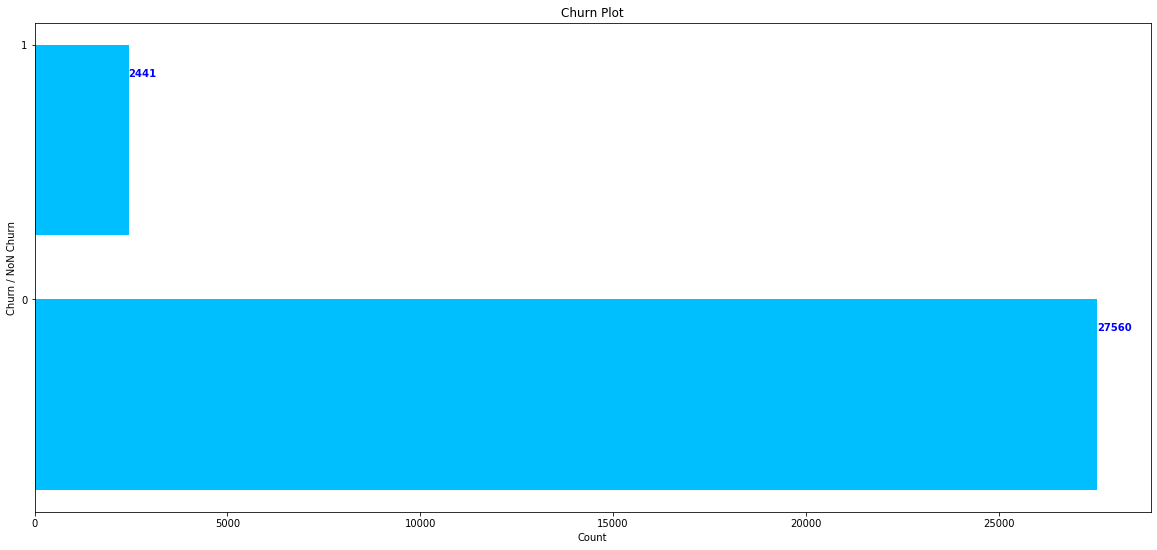

In [1338]:
a = telecom_cust.Churn.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="deepskyblue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Churn Plot')
plt.xlabel('Count')
plt.ylabel('Churn / NoN Churn')
plt.show()

In the above bar plot, from the dataframe containing 30001 records of High Value Customers -
- Churn count is found as 2441 and 
- Non-Churn count is 27560

<b> Plotting Pie Chart for Churn Rate

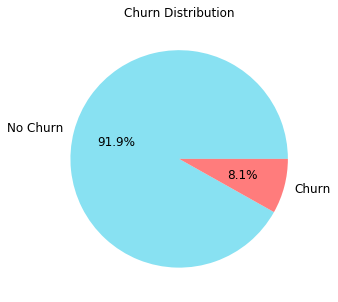

In [1339]:
# Plotting Pie chart for Churn Rate
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', labels = ['No Churn', 'Churn'],figsize =(5,5), fontsize = 12,colors=['#88e1f2','#ff7c7c'] )                                                                           
ax.set_ylabel('',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [1340]:
## So we have an issue of class imbalance here since one category is less than 10% of the other

###### CHURN IS THE DEPENDENT VARIABLE So we will analyse the CORRELATION OF VARIOUS FEATURES WITH CHURN to identify
###### If they are good PREDICTORS OF CHURN OR NOT

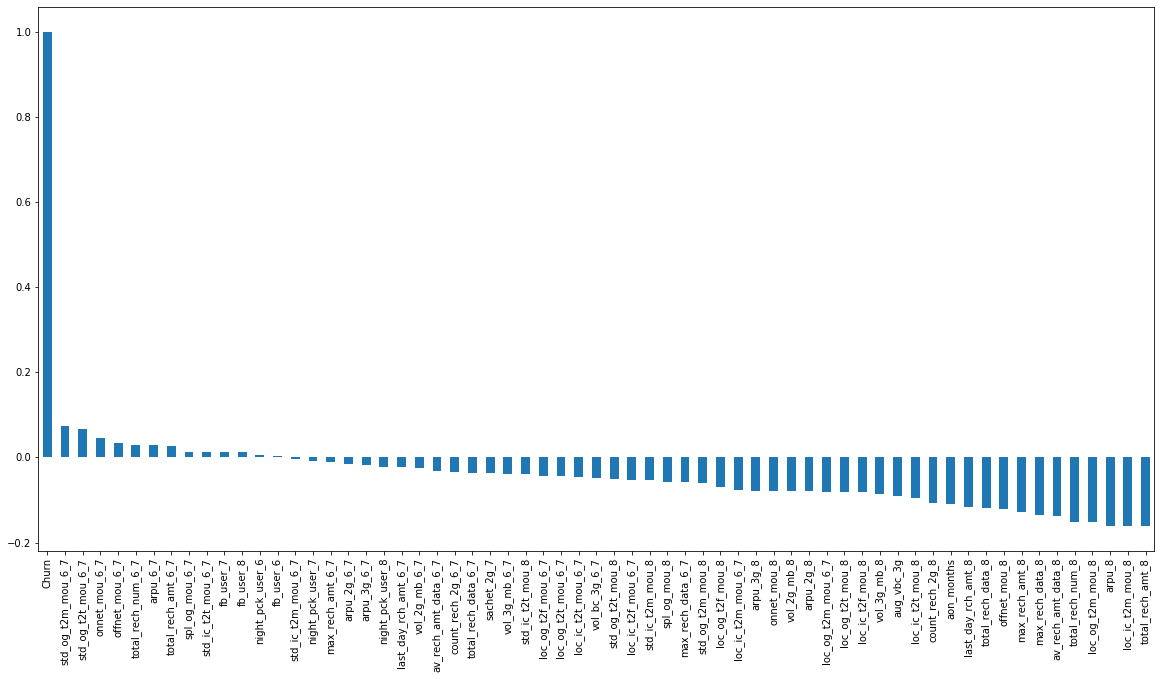

In [1341]:
## Plot correlation of each variable with Churn 
plt.figure(figsize=(20,10))
telecom_cust.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

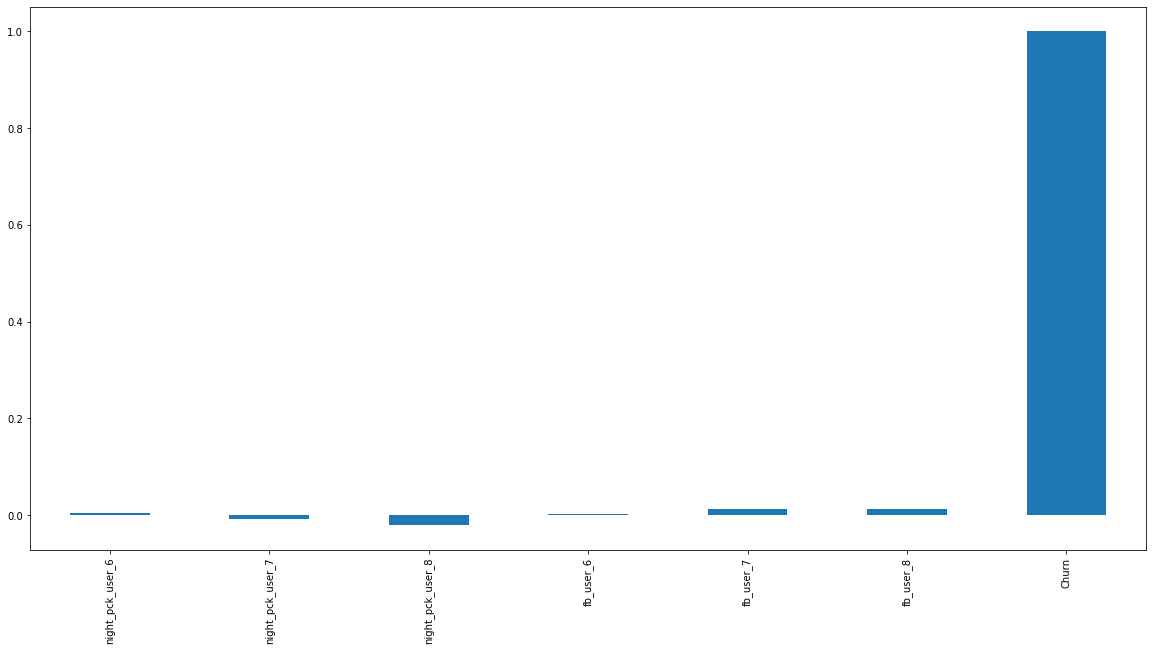

In [1342]:
## Plot correlation of each categorical variable with Churn 
plt.figure(figsize=(20,10))
telecom_cust[categorical_features].corr()['Churn'].plot(kind='bar')
plt.show()

In [1343]:
## fb_user_6 and night_pack_user_6 are not so correlated to Churn so we can discard these
telecom_cust = telecom_cust.drop(['night_pck_user_6','fb_user_6','std_ic_t2m_mou_6_7'],axis=1)

In [1344]:
## Categorical features 
categorical_features = []
non_categorical_features = []
for each_col in list(telecom_cust.columns):
    if telecom_cust[each_col].nunique() == 2:
        print(each_col,' => ', telecom_cust[each_col].unique())
        categorical_features.append(each_col)
    else:
        if each_col != 'mobile_number':
            non_categorical_features.append(each_col)

night_pck_user_7  =>  [0. 1.]
night_pck_user_8  =>  [0. 1.]
fb_user_7  =>  [1. 0.]
fb_user_8  =>  [1. 0.]
Churn  =>  [1 0]


In [1345]:
telecom_cust.corr()['Churn'].sort_values(ascending = False)

Churn                   1.000000
std_og_t2m_mou_6_7      0.074864
std_og_t2t_mou_6_7      0.067878
onnet_mou_6_7           0.044974
offnet_mou_6_7          0.032825
total_rech_num_6_7      0.029695
arpu_6_7                0.029093
total_rech_amt_6_7      0.026507
spl_og_mou_6_7          0.013584
std_ic_t2t_mou_6_7      0.013157
fb_user_7               0.012193
fb_user_8               0.012034
night_pck_user_7       -0.008243
max_rech_amt_6_7       -0.009801
arpu_2g_6_7            -0.016325
arpu_3g_6_7            -0.018567
night_pck_user_8       -0.021559
last_day_rch_amt_6_7   -0.023374
vol_2g_mb_6_7          -0.024865
av_rech_amt_data_6_7   -0.030643
count_rech_2g_6_7      -0.035108
total_rech_data_6_7    -0.035386
sachet_2g_7            -0.036603
vol_3g_mb_6_7          -0.037839
std_ic_t2t_mou_8       -0.038847
loc_og_t2f_mou_6_7     -0.043755
loc_og_t2t_mou_6_7     -0.044003
loc_ic_t2t_mou_6_7     -0.046643
vol_bc_3g_6_7          -0.047821
std_og_t2t_mou_8       -0.051708
loc_ic_t2f

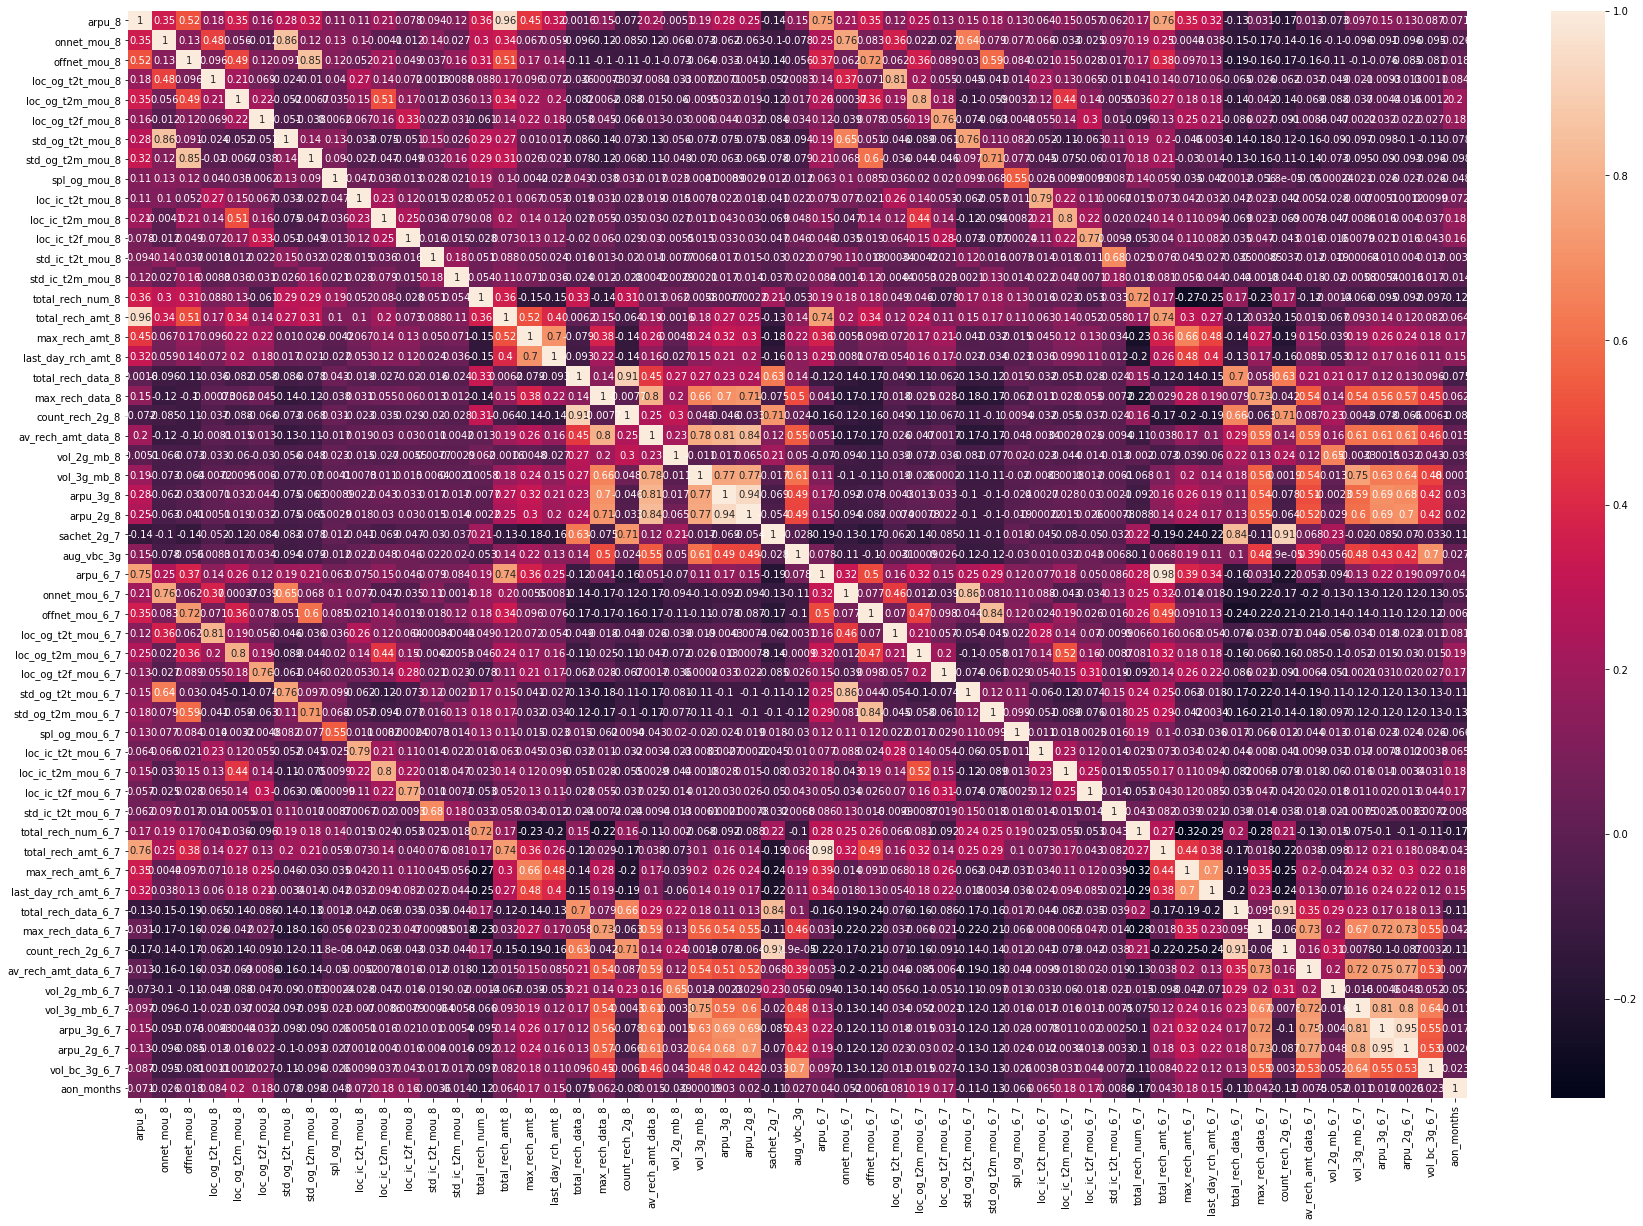

In [1346]:
plt.figure(figsize = (30,20))
sns.heatmap(telecom_cust[non_categorical_features].corr(), annot=True)
plt.show()

#### We observe that there are features with high correlation to each other

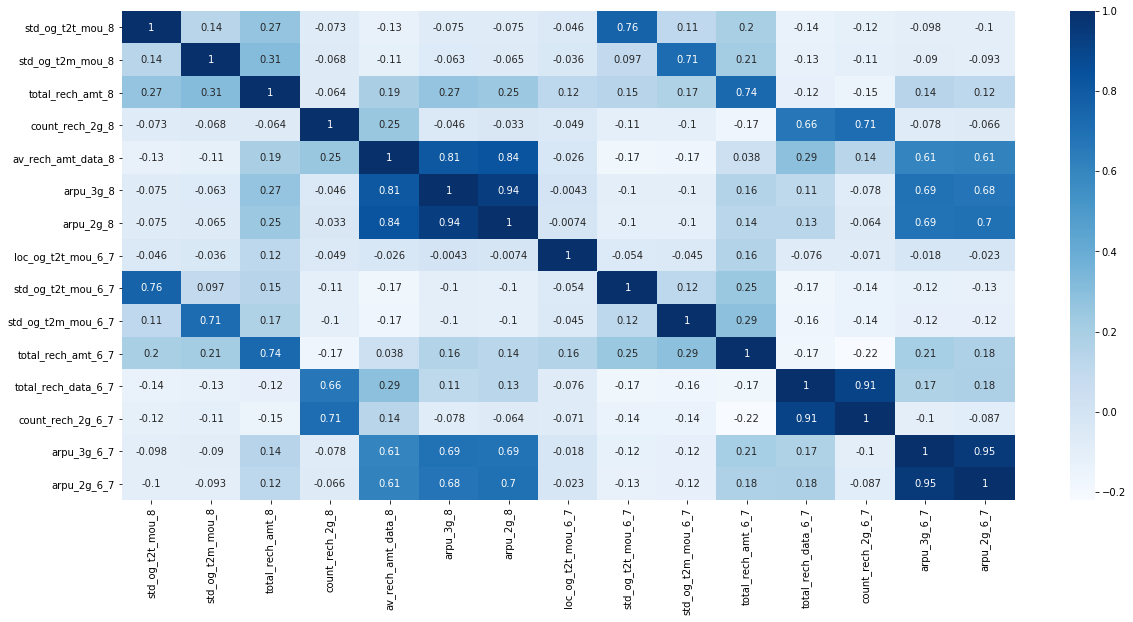

In [1347]:
# Create correlation matrix
corr_matrix = telecom_cust.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

sns.heatmap(telecom_cust[to_drop].corr(),annot=True,cmap='Blues')
plt.show()

In [1348]:
telecom_cust.shape

(30001, 60)

In [1349]:
telecom_cust['aon_months'].describe()

count    30001.000000
mean        40.312292
std         31.922600
min          6.000000
25%         15.333333
50%         28.200000
75%         58.533333
max        144.033333
Name: aon_months, dtype: float64

In [1350]:
aon_range = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
telecom_cust['aon_month_range'] = pd.cut(telecom_cust['aon_months'], aon_range)

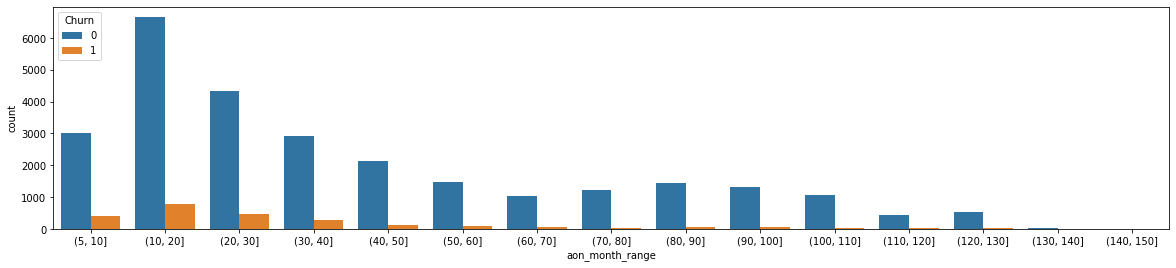

In [1351]:
plt.subplot(2,1,1)
sns.countplot(x='aon_month_range',data=telecom_cust,hue='Churn')
plt.show()

In [1352]:
telecom_cust = telecom_cust.drop('aon_month_range',axis=1)

In [1353]:
## There are very few customers who stay in one network for more than a 100 months
## Churn rate is highest in customers who have been using the network for about 10 to 20 months

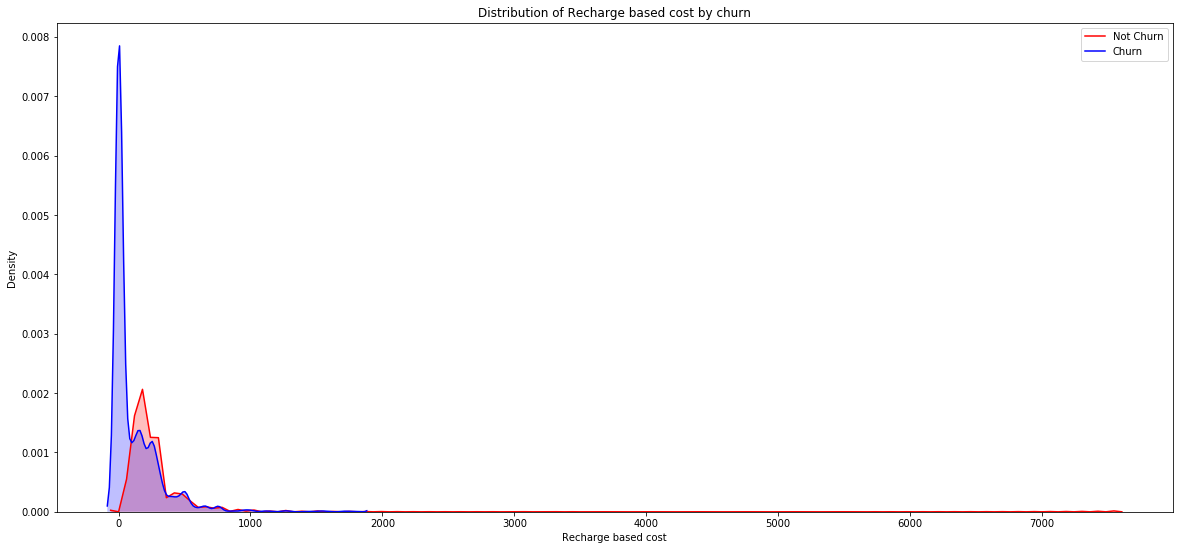

In [1354]:
ax = sns.kdeplot(telecom_cust.av_rech_amt_data_6_7[(telecom_cust["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.av_rech_amt_data_6_7[(telecom_cust["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Recharge based cost')
ax.set_title('Distribution of Recharge based cost by churn')
plt.show()

#### People who have not reacharged in 6th or 7th month are more likely to Churn

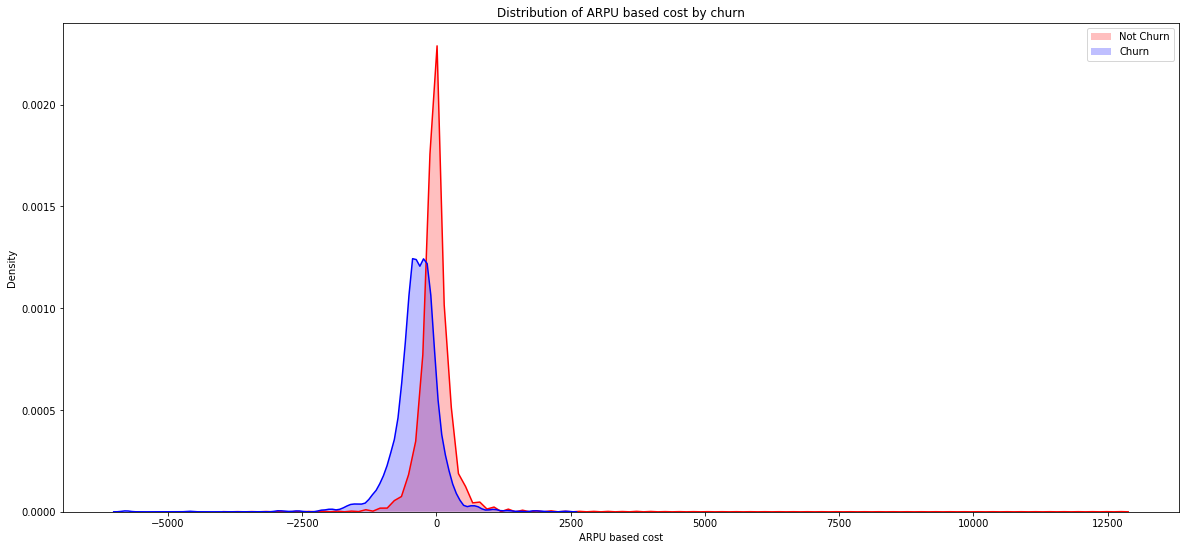

In [1355]:
ax = sns.kdeplot((telecom_cust['arpu_8']-telecom_cust['arpu_6_7'])[(telecom_cust["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot((telecom_cust['arpu_8']-telecom_cust['arpu_6_7'])[(telecom_cust["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('ARPU based cost')
ax.set_title('Distribution of ARPU based cost by churn')
plt.show()

#### People with high negative difference between arpu_8 and arpu_6_7 are more likely to churn

<hr>

## STEP 6 : Model Building For Prediction 

#### STANDARDIZE THE DATASET

In [1356]:
from sklearn.model_selection import train_test_split
import statsmodels

# Putting feature variable to X
X = telecom_cust.drop(['Churn'],axis=1)

# Putting response variable to y
y = telecom_cust['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

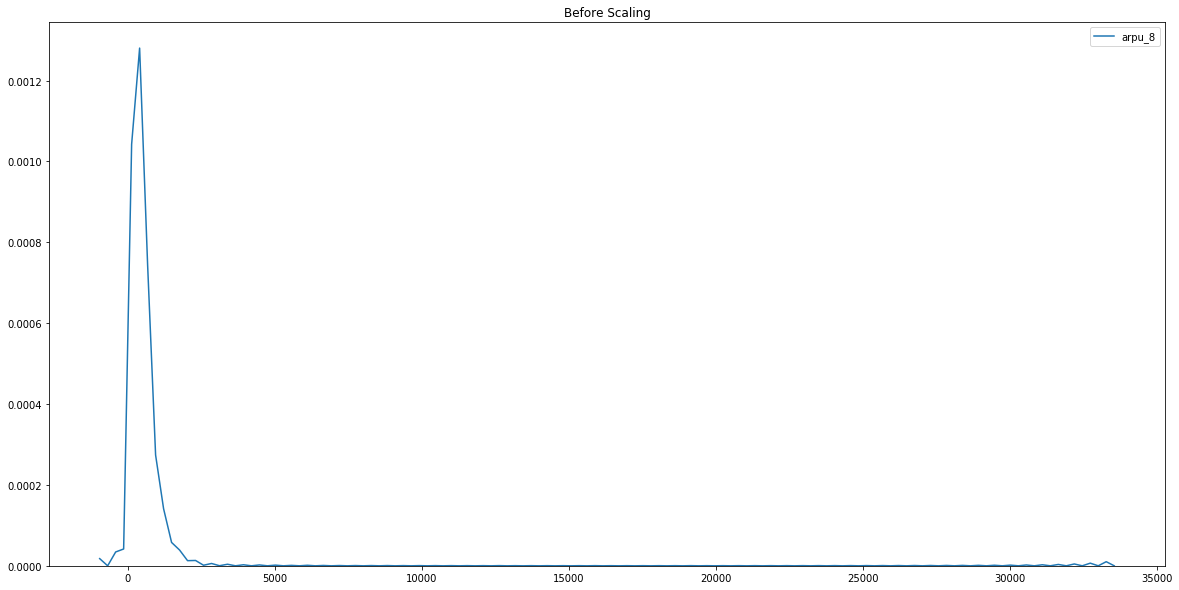

In [1357]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(X['arpu_8'], bw=1,ax=ax1)
plt.show()

In [1358]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_are = list(X.columns)
X[columns_are] = scaler.fit_transform(X[columns_are])

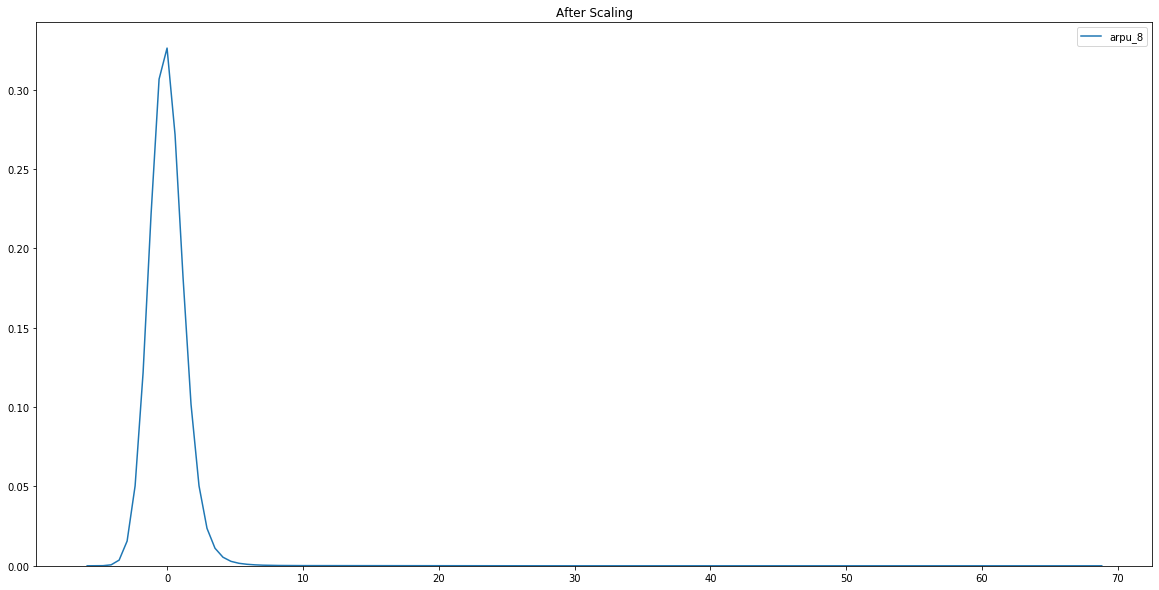

In [1359]:
fig, (ax2) = plt.subplots(ncols=1, figsize=(20, 10))
ax2.set_title('After Scaling')
sns.kdeplot(X['arpu_8'], bw=1,ax=ax2)
plt.show()

### Train Test Split the Data

In [1360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [1361]:
#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_bal,y_train_bal = sm.fit_sample(X_train,y_train)
print(X_train_bal.shape)
print(y_train_bal.shape)

(38618, 59)
(38618,)


### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [1362]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [1363]:
#Doing the PCA on the train data
pca.fit(X_train_bal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [1364]:
colnames = list(X_train_bal.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2           Feature
0  0.161797  0.261989            arpu_8
1 -0.003315  0.186218       onnet_mou_8
2  0.033683  0.220502      offnet_mou_8
3  0.033391  0.083647  loc_og_t2t_mou_8
4  0.073528  0.132021  loc_og_t2m_mou_8

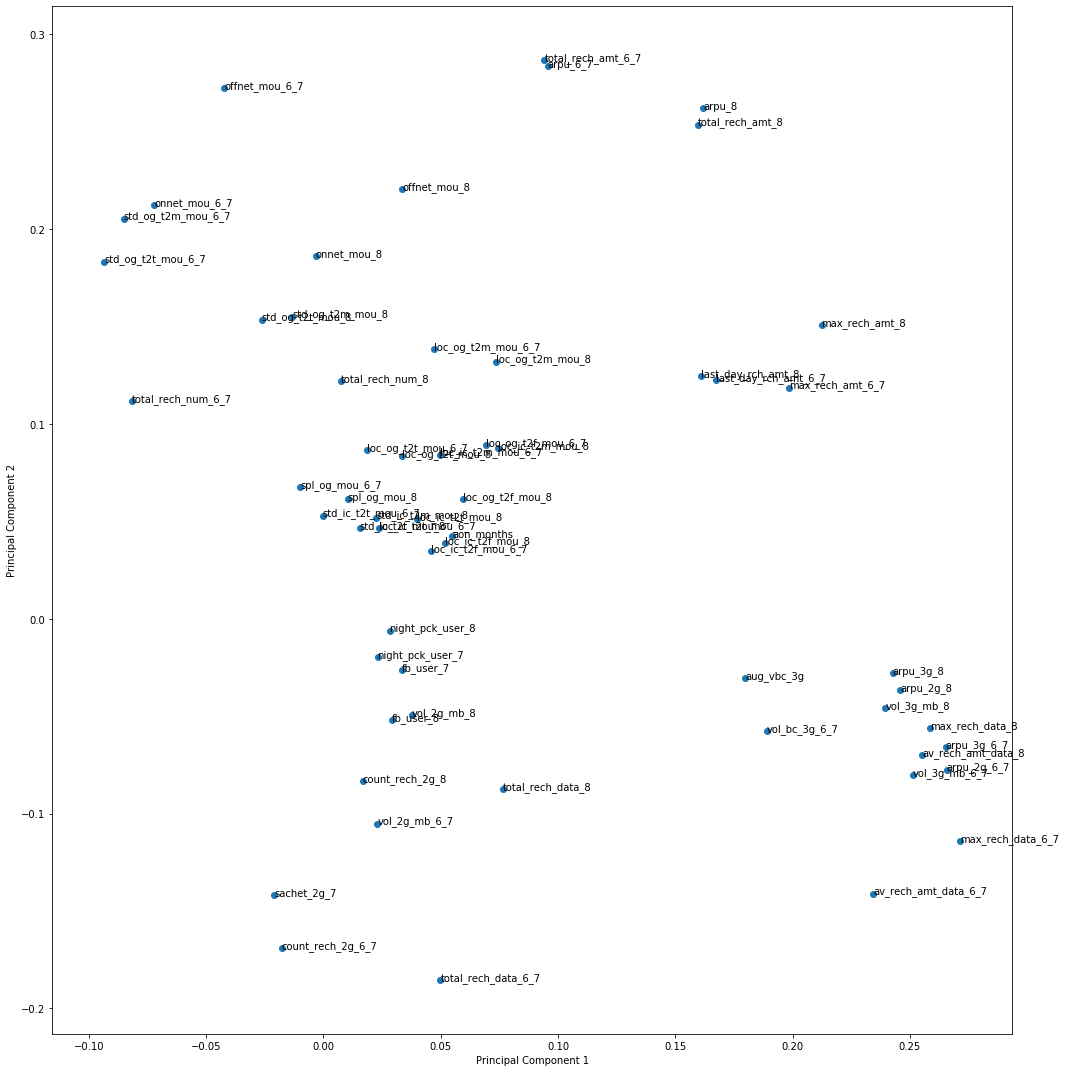

In [1365]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [1366]:
pca.explained_variance_ratio_

array([1.49872939e-01, 1.26557102e-01, 7.49134947e-02, 6.50505715e-02,
       5.71599213e-02, 4.17942512e-02, 3.26579380e-02, 2.93825715e-02,
       2.69295171e-02, 2.66213478e-02, 2.54038822e-02, 2.40695166e-02,
       2.12758117e-02, 2.10092931e-02, 1.96922350e-02, 1.82537200e-02,
       1.74709014e-02, 1.64466080e-02, 1.46916229e-02, 1.40622503e-02,
       1.31911860e-02, 1.28468052e-02, 1.23186388e-02, 1.20557667e-02,
       1.12498307e-02, 1.06333586e-02, 9.81097546e-03, 7.47105072e-03,
       7.20625929e-03, 6.85670868e-03, 6.69669165e-03, 5.92488994e-03,
       5.69081312e-03, 5.36352263e-03, 4.74414049e-03, 4.40966158e-03,
       4.12552387e-03, 4.05879136e-03, 3.81715717e-03, 3.58402079e-03,
       3.36267504e-03, 3.14233488e-03, 3.03819296e-03, 2.33891659e-03,
       2.19304496e-03, 2.16759301e-03, 1.78760286e-03, 1.39037470e-03,
       1.06043478e-03, 8.76164287e-04, 7.85227560e-04, 5.78850921e-04,
       4.82580070e-04, 4.28065971e-04, 3.59248884e-04, 2.73343961e-04,
      

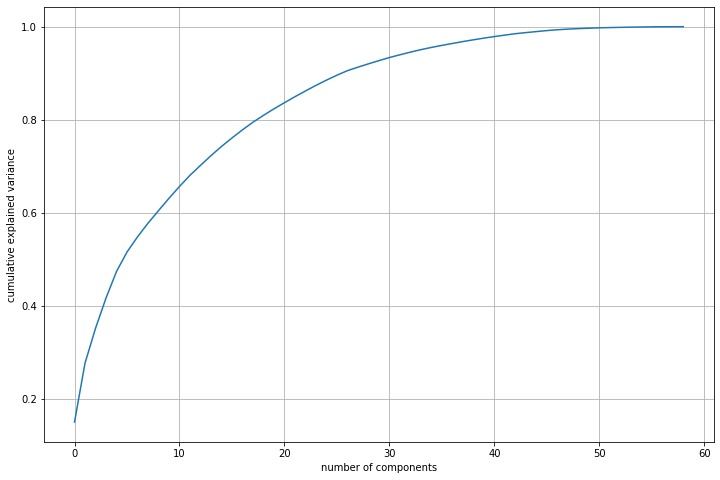

In [1367]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [1368]:
## 40 components explain upto 98% variance

In [1369]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

#### Basis transformation - getting the data onto our PCs

In [1370]:
df_train_pca = pca_final.fit_transform(X_train_bal)
df_train_pca.shape

(38618, 40)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [1371]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

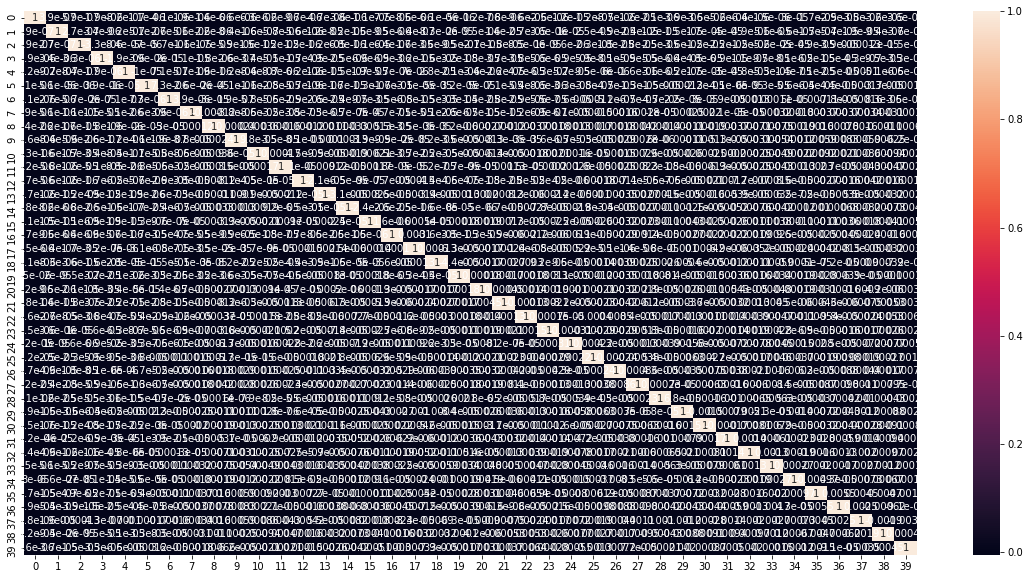

In [1372]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [1373]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.005455242464448202 , min corr:  -0.004731515590312046


- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [1374]:
X_train_pca = pca_final.fit_transform(X_train_bal)
print(X_train_pca.shape)

X_test_pca = pca_final.transform(X_test)
print(X_test_pca.shape)

(38618, 40)
(9001, 40)


### Important => <br>Since we are trying to predict which customer can churn in future we will use SENSITIVITY metric

In [1375]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score

#### LOGISTIC REGRESSION

In [1377]:
from sklearn.linear_model import LogisticRegression

logistic_pca = LogisticRegression()


logistic_pca.fit(X_train_pca, y_train_bal)

print('training accuracy :=>', logistic_pca.score(X_train_pca, y_train_bal))

# Predicted probabilities
y_pred = logistic_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

training accuracy :=> 0.8288621886167072


In [1378]:
print("The accuracy Score for logistic Regression is :", accuracy_score(y_test,y_pred))

The accuracy Score for logistic Regression is : 0.8125763804021775


In [1379]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6700 1551]
 [ 136  614]]


In [1380]:
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred),['Churn', 'Non Churn'],['Churn', 'Non Churn'])

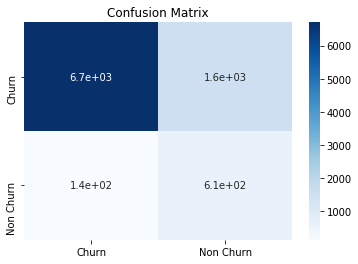

In [1381]:
sns.heatmap(conf_df,cmap='Blues', annot=True)
plt.title('Confusion Matrix')
plt.show()

In [1382]:
print('Sensitivity Score for logistic Regression is:',recall_score(y_test, y_pred))

Sensitivity Score for logistic Regression is: 0.8186666666666667


In [1383]:
# True Positives
TP = confusion_matrix(y_test,y_pred)[1, 1]
# True Negatives
TN = confusion_matrix(y_test,y_pred)[0, 0]
# False Positives
FP = confusion_matrix(y_test,y_pred)[0, 1]
# False Negatives
FN = confusion_matrix(y_test,y_pred)[1, 0]

In [1384]:
print('Specificity Score for logistic Regression is:',TN / float(TN + FP))

Specificity Score for logistic Regression is: 0.8120227851169555


In [1385]:
print('Precision Score for logistic Regression is:',precision_score(y_test, y_pred))

Precision Score for logistic Regression is: 0.2836027713625866


In [1386]:
logistic_eval_metrics = pd.DataFrame([[accuracy_score(y_test,y_pred)*100,recall_score(y_test, y_pred)*100,(TN / float(TN + FP))*100,
                                     precision_score(y_test, y_pred)*100]], columns =['Accuracy%','Recall%','Specificity%','Precision%'])

In [1387]:
logistic_eval_metrics

Accuracy%    Recall%  Specificity%  Precision%
0  81.257638  81.866667     81.202279   28.360277

In [1388]:
## AUROC => AUC ROC CURVE
### SENSITIVITY = TPR => Y axis
### 1- SPECIFICITY = FPR => X axis

In [1389]:
# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability

In [1390]:
# when AUC is 0.5, it means model has no class separation capacity whatsoever.

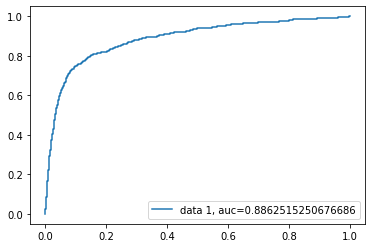

In [1391]:
y_pred_proba = logistic_pca.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### approximately 0.85 is the AUC which is very nice 

In [1393]:
## Lets now tune the hyperparameters 
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5,3,3.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

logistic_reg = LogisticRegression()
random = RandomizedSearchCV(estimator=logistic_reg, param_distributions=param_grid, cv = 3, n_jobs=-1)
start_time = time.time()
random_result = random.fit(X_train_pca, y_train_bal)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.827516 using {'max_iter': 140, 'dual': False, 'C': 2.5}
Execution time: 22.708888053894043 ms


In [1394]:
## As the Train Accuracy hasnot increased much we can continue with previous metrics
logistic_eval_metrics

Accuracy%    Recall%  Specificity%  Precision%
0  81.257638  81.866667     81.202279   28.360277

#### DECISION TREE

In [1224]:
## Decision Tree with default hyperparameters
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import os

In [1225]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_bal, y_train_bal)

# Predicted probabilities
y_pred_dt = dt_default.predict(X_test)

# Converting y_pred to a dataframe which is an array
y_pred_df_dt = pd.DataFrame(y_pred_dt)

In [1226]:
os.environ["PATH"] += os.pathsep + "/Users/vikaskumra/anaconda3/lib/graphviz/"
print(os.environ['PATH'])

/Users/vikaskumra/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.7/bin:/usr/local/opt/openssl/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/bin/python:/usr/local/share/dotnet:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands:/usr/local/mongodb/bin:/Users/vikaskumra/flutterApps/flutter/bin:/Users/vikaskumra/anaconda3/lib/graphviz/:/Users/vikaskumra/anaconda3/lib/graphviz/:/Users/vikaskumra/anaconda3/lib/graphviz/


In [1227]:
# Putting features
features = list(X_train_bal.columns[0:])
features

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_7',
 'night_pck_user_8',
 'sachet_2g_7',
 'fb_user_7',
 'fb_user_8',
 'aug_vbc_3g',
 'arpu_6_7',
 'onnet_mou_6_7',
 'offnet_mou_6_7',
 'loc_og_t2t_mou_6_7',
 'loc_og_t2m_mou_6_7',
 'loc_og_t2f_mou_6_7',
 'std_og_t2t_mou_6_7',
 'std_og_t2m_mou_6_7',
 'spl_og_mou_6_7',
 'loc_ic_t2t_mou_6_7',
 'loc_ic_t2m_mou_6_7',
 'loc_ic_t2f_mou_6_7',
 'std_ic_t2t_mou_6_7',
 'total_rech_num_6_7',
 'total_rech_amt_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'max_r

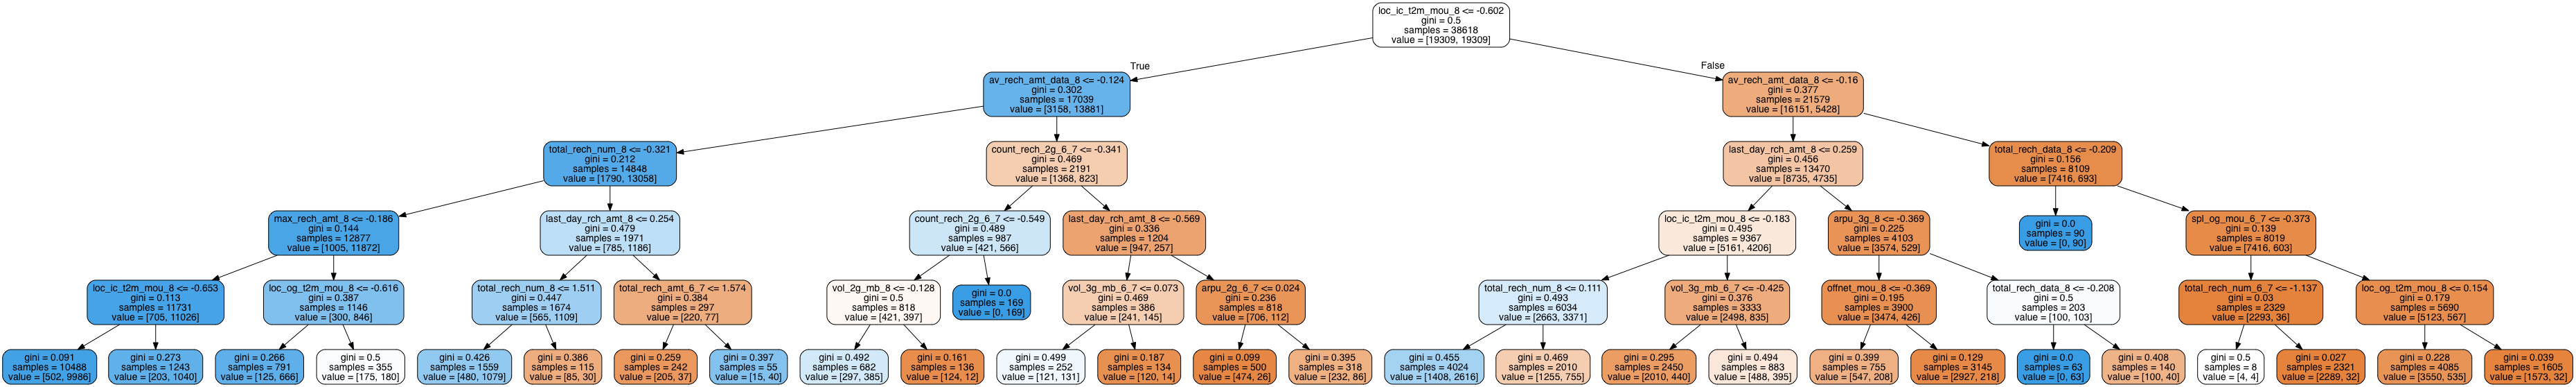

In [1228]:
# plotting tree with max_depth=5
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1229]:
print("Train Accuracy for Decision Tree : ",dt_default.score(X_train_bal, y_train_bal))

Train Accuracy for Decision Tree :  0.8397120513750065


In [1230]:
print("The accuracy Score for Decision Tree is :", accuracy_score(y_test,y_pred_dt))

The accuracy Score for Decision Tree is : 0.8256860348850128


In [1231]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_df_dt))

[[6844 1407]
 [ 162  588]]


In [1232]:
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred_df_dt),['Churn', 'Non Churn'],['Churn', 'Non Churn'])

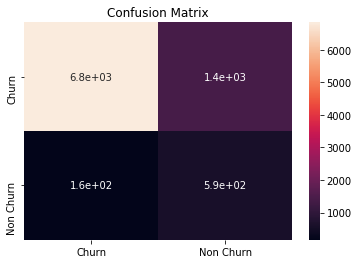

In [1233]:
sns.heatmap(conf_df, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [1234]:
print('Sensitivity Score for Decision Tree is:',recall_score(y_test, y_pred_dt))

Sensitivity Score for Decision Tree is: 0.784


In [1235]:
# True Positives
TP = confusion_matrix(y_test,y_pred_dt)[1, 1]
# True Negatives
TN = confusion_matrix(y_test,y_pred_dt)[0, 0]
# False Positives
FP = confusion_matrix(y_test,y_pred_dt)[0, 1]
# False Negatives
FN = confusion_matrix(y_test,y_pred_dt)[1, 0]

In [1236]:
print('Specificity Score for Decision Tree is:',TN / float(TN + FP))

Specificity Score for Decision Tree is: 0.8294752151254393


In [1237]:
print('Precision Score for Decision Tree is:',precision_score(y_test, y_pred_dt))

Precision Score for Decision Tree is: 0.29473684210526313


In [1238]:
Decision_Tree_eval_metrics = pd.DataFrame([[accuracy_score(y_test,y_pred_dt)*100,recall_score(y_test, y_pred_dt)*100,(TN / float(TN + FP))*100,
                                     precision_score(y_test, y_pred_dt)*100]], columns =['Accuracy%','Recall%','Specificity%','Precision%'])

In [1239]:
Decision_Tree_eval_metrics

Accuracy%  Recall%  Specificity%  Precision%
0  82.568603     78.4     82.947522   29.473684

In [1240]:
## AUROC => AUC ROC CURVE
### SENSITIVITY = TPR => Y axis
### 1- SPECIFICITY = FPR => X axis

In [1241]:
# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability

In [1242]:
# when AUC is 0.5, it means model has no class separation capacity whatsoever.

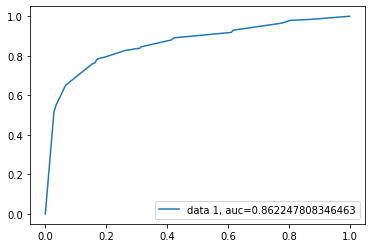

In [1243]:
y_pred_proba = dt_default.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Hyper Parameter Tuning for Decision Tree

In [1245]:
from sklearn.model_selection import GridSearchCV

para_list = {'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5],
             'criterion':['gini','entropy']}
scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(dt_default,para_list,scoring=scorer)

In [1246]:
grid_fit = grid_obj.fit(X_train_bal,y_train_bal)

In [1247]:
best_clf = grid_fit.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1248]:
best_clf_train_predict = best_clf.predict(X_train_bal)
best_clf_test_predict = best_clf.predict(X_test)

In [1249]:
print('The Training Sensitivity :',recall_score(best_clf_train_predict,y_train_bal))
print('The Test Sensitivity :',recall_score(best_clf_test_predict,y_test))

The Training Sensitivity : 0.7590614525139665
The Test Sensitivity : 0.21448181194234728


##### So model didn't do well even after tuning

#### Random Forest

In [1396]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)

rf.fit(X_train_bal,y_train_bal)

y_pred_rf=rf.predict(X_test)

In [1397]:
print("The accuracy Score for Random Forest is :", accuracy_score(y_test,y_pred_rf))

The accuracy Score for Random Forest is : 0.9311187645817132


In [1398]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_rf))

[[7913  338]
 [ 282  468]]


In [1399]:
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred_rf),['Churn', 'Non Churn'],['Churn', 'Non Churn'])

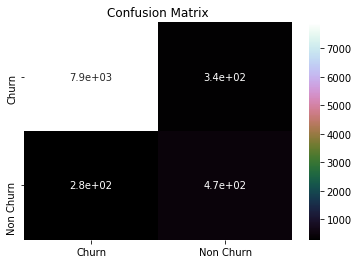

In [1400]:
sns.heatmap(conf_df, annot=True,cmap='cubehelix')
plt.title('Confusion Matrix')
plt.show()

In [1401]:
print('Sensitivity Score for Random Forest is:',recall_score(y_test, y_pred_dt))

Sensitivity Score for Random Forest is: 0.784


In [1402]:
# True Positives
TP = confusion_matrix(y_test,y_pred_rf)[1, 1]
# True Negatives
TN = confusion_matrix(y_test,y_pred_rf)[0, 0]
# False Positives
FP = confusion_matrix(y_test,y_pred_rf)[0, 1]
# False Negatives
FN = confusion_matrix(y_test,y_pred_rf)[1, 0]

In [1403]:
print('Specificity Score for Random Forest is:',TN / float(TN + FP))

Specificity Score for Random Forest is: 0.9590352684523088


In [1404]:
print('Precision Score for Random Forest is:',precision_score(y_test, y_pred_rf))

Precision Score for Random Forest is: 0.5806451612903226


In [1405]:
Random_Forest_eval_metrics = pd.DataFrame([[accuracy_score(y_test,y_pred_rf)*100,recall_score(y_test, y_pred_rf)*100,(TN / float(TN + FP))*100,
                                     precision_score(y_test, y_pred_rf)*100]], columns =['Accuracy%','Recall%','Specificity%','Precision%'])

In [1406]:
Random_Forest_eval_metrics

Accuracy%  Recall%  Specificity%  Precision%
0  93.111876     62.4     95.903527   58.064516

In [1407]:
## AUROC => AUC ROC CURVE
### SENSITIVITY = TPR => Y axis
### 1- SPECIFICITY = FPR => X axis

In [1408]:
# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability

In [1409]:
# when AUC is 0.5, it means model has no class separation capacity whatsoever.

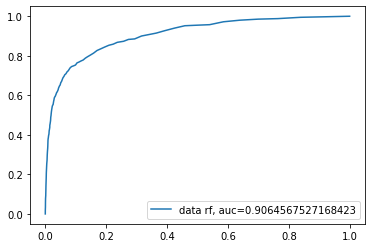

In [1410]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data rf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [1411]:
## Tuning The HyperParameters 

In [1268]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
para_list = {
    'max_depth': [3,20,12],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf_clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_clf, param_grid = para_list, return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

In [1269]:
best_clf = grid_search.fit(X_train_bal,y_train_bal)
best_clf

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [1270]:
best_clf_train_predict = best_clf.predict(X_train_bal)
best_clf_test_predict = best_clf.predict(X_test)

In [1271]:
print('The Training Sensitivity :',recall_score(best_clf_train_predict,y_train_bal))
print('The Test Sensitivity :',recall_score(best_clf_test_predict,y_test))

The Training Sensitivity : 0.9062015089089839
The Test Sensitivity : 0.4238310708898944


In [1281]:
## Test Sensitivity is very low

<table> 
    <tr><th>Model Name</th><th> Test Accuracy </th><th> Test Sensitivity </th><th> Test Precision</th></tr>
    <tr><td>Logistic Regression </td> <td>81.290968%</td><td>82.0%</td><td>28.419593%</td></tr>
    <tr><td>Decision Tree </td> <td>82.568603%</td><td>78.4%</td><td>29.473684%</td></tr>
    <tr><td>Random Forest </td> <td>93.289634%</td><td>62.666667%</td><td>59.193955%</td></tr>
</table>

### Although the accuracy for Random Forest is the highest we are concerned about Sensitivity<br>
### So from above we conclude that Logistic regression suits best in this problem

<hr>

## STEP 7:  INTERPRETABLE MODEL

In [1028]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [1029]:
log_model = LogisticRegression()
rfe = RFE(log_model, 30)
fit = rfe.fit(X_train_bal, y_train_bal)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/vikaskumra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/vikaskumra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/vikaskumra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/vikaskumra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Num Features: 30
Selected Features: [False  True False  True  True False  True  True False  True  True  True
  True False  True  True  True  True  True  True False False  True False
 False  True False False False False False  True  True  True  True  True
  True False  True  True False  True  True False  True False False False
 False  True False False False False False False False False  True]
Feature Ranking: [ 3  1 20  1  1 14  1  1  9  1  1  1  1  4  1  1  1  1  1  1  8 12  1 11
 21  1 28 26 16 17 18  1  1  1  1  1  1 30  1  1 25  1  1 27  1 19  2 10
 29  1 24  7 22 13  6 15  5 23  1]


In [1030]:
list(zip(X_train_bal.columns,rfe.support_,rfe.ranking_))

[('arpu_8', False, 3),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 20),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 14),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('spl_og_mou_8', False, 9),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', False, 4),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('count_rech_2g_8', False, 8),
 ('av_rech_amt_data_8', False, 12),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', False, 11),
 ('arpu_3g_8', False, 21),
 ('arpu_2g_8', True, 1),
 ('night_pck_user_7', False, 28),
 ('night_pck_user_8', False, 26),
 ('sachet_2g_7', False, 16),
 ('fb_user_7', False, 17),
 ('fb_user_8', False, 18),
 ('aug_vbc_3g', True, 1),
 ('arpu_6_7', True, 1),

In [1031]:
#cols selected for rfe
X_train_bal.columns[rfe.support_]

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'vol_2g_mb_8', 'arpu_2g_8', 'aug_vbc_3g', 'arpu_6_7', 'onnet_mou_6_7',
       'offnet_mou_6_7', 'loc_og_t2t_mou_6_7', 'loc_og_t2m_mou_6_7',
       'std_og_t2t_mou_6_7', 'std_og_t2m_mou_6_7', 'loc_ic_t2t_mou_6_7',
       'loc_ic_t2m_mou_6_7', 'std_ic_t2t_mou_6_7', 'total_rech_data_6_7',
       'aon_months'],
      dtype='object')

### BUILDING MODELS USING STATSMODEL API

##### model 1

In [1032]:
import statsmodels.api as sm 

In [1033]:
# building models using statsmodel for better stats
X_train_bal_rfe = X_train_bal[X_train_bal.columns[rfe.support_]]

In [1034]:
X_train_lm = sm.add_constant(X_train_bal_rfe)

In [1035]:
log_model = sm.OLS(y_train_bal, X_train_lm).fit()

In [1036]:
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     936.7
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:54:12   Log-Likelihood:                -17465.
No. Observations:               38618   AIC:                         3.499e+04
Df Residuals:                   38587   BIC:                         3.526e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3221    

In [1038]:
X_train_new = X_train_lm.drop(['onnet_mou_8','std_og_t2t_mou_8','onnet_mou_6_7','loc_og_t2t_mou_6_7','std_og_t2t_mou_6_7',
                              'std_og_t2m_mou_6_7'],axis=1)

##### model 2

In [1039]:
X_train_lm = sm.add_constant(X_train_new)

In [1040]:
log_model = sm.OLS(y_train_bal, X_train_lm).fit()

In [1041]:
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:58:53   Log-Likelihood:                -17755.
No. Observations:               38618   AIC:                         3.556e+04
Df Residuals:                   38593   BIC:                         3.577e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3258    

In [1042]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9      total_rech_amt_8  4.52
10       max_rech_amt_8  3.52
2      loc_og_t2m_mou_8  3.11
5      loc_ic_t2m_mou_8  3.05
19   loc_og_t2m_mou_6_7  3.01
13      max_rech_data_8  2.91
21   loc_ic_t2m_mou_6_7  2.85
17             arpu_6_7  2.81
15            arpu_2g_8  2.64
11   last_day_rch_amt_8  2.49
18       offnet_mou_6_7  2.40
4      loc_ic_t2t_mou_8  2.15
12    total_rech_data_8  2.13
20   loc_ic_t2t_mou_6_7  2.09
7      std_ic_t2t_mou_8  1.99
22   std_ic_t2t_mou_6_7  1.98
3      std_og_t2m_mou_8  1.91
8      total_rech_num_8  1.83
23  total_rech_data_6_7  1.75
16           aug_vbc_3g  1.44
0                 const  1.29
14          vol_2g_mb_8  1.20
1      loc_og_t2t_mou_8  1.17
6      loc_ic_t2f_mou_8  1.13
24           aon_months  1.13

In [1044]:
for each_col in list(X_test.columns):
    if each_col not in list(X_train_new.columns):
        X_test = X_test.drop(each_col,axis=1)

In [1045]:
X_test.columns

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'vol_2g_mb_8', 'arpu_2g_8', 'aug_vbc_3g', 'arpu_6_7',
       'offnet_mou_6_7', 'loc_og_t2m_mou_6_7', 'loc_ic_t2t_mou_6_7',
       'loc_ic_t2m_mou_6_7', 'std_ic_t2t_mou_6_7', 'total_rech_data_6_7',
       'aon_months'],
      dtype='object')

In [1054]:
log_model = LogisticRegression()
X_train_new  = X_train_new.drop('const',axis=1)
log_model.fit(X_train_new,y_train_bal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1055]:
log_model.score(X_train_new,y_train_bal)

0.8303381842664043

In [1056]:
y_pred = log_model.predict(X_test)

In [1057]:
print("The accuracy Score for logistic Regression is :", accuracy_score(y_test,y_pred))

The accuracy Score for logistic Regression is : 0.818131318742362


In [1058]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6751 1500]
 [ 137  613]]


In [1059]:
conf_df = pd.DataFrame(confusion_matrix(y_test,y_pred),['Churn', 'Non Churn'],['Churn', 'Non Churn'])

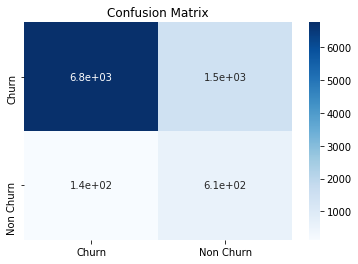

In [1060]:
sns.heatmap(conf_df,cmap='Blues', annot=True)
plt.title('Confusion Matrix')
plt.show()

In [1061]:
print('Sensitivity Score for logistic Regression is:',recall_score(y_test, y_pred))

Sensitivity Score for logistic Regression is: 0.8173333333333334


In [1062]:
# True Positives
TP = confusion_matrix(y_test,y_pred)[1, 1]
# True Negatives
TN = confusion_matrix(y_test,y_pred)[0, 0]
# False Positives
FP = confusion_matrix(y_test,y_pred)[0, 1]
# False Negatives
FN = confusion_matrix(y_test,y_pred)[1, 0]

In [1063]:
print('Specificity Score for logistic Regression is:',TN / float(TN + FP))

Specificity Score for logistic Regression is: 0.8182038540782935


In [1064]:
print('Precision Score for logistic Regression is:',precision_score(y_test, y_pred))

Precision Score for logistic Regression is: 0.29010884997633696


In [1065]:
logistic_eval_metrics = pd.DataFrame([[accuracy_score(y_test,y_pred)*100,recall_score(y_test, y_pred)*100,(TN / float(TN + FP))*100,
                                     precision_score(y_test, y_pred)*100]], columns =['Accuracy%','Recall%','Specificity%','Precision%'])

In [1066]:
logistic_eval_metrics

Accuracy%    Recall%  Specificity%  Precision%
0  81.813132  81.733333     81.820385   29.010885

In [1067]:
## AUROC => AUC ROC CURVE
### SENSITIVITY = TPR => Y axis
### 1- SPECIFICITY = FPR => X axis

In [1068]:
# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability

In [1069]:
# when AUC is 0.5, it means model has no class separation capacity whatsoever.

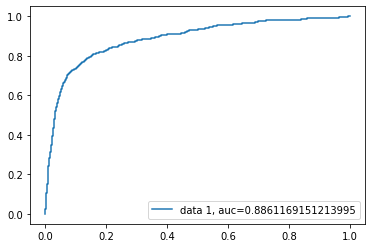

In [1073]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Important Features That Determine Churn by their weights 

In [1092]:
log_model.coef_.T

array([[-0.24673006],
       [-0.92598503],
       [-0.51033483],
       [-1.15581342],
       [-1.42330525],
       [-0.39197738],
       [-0.62786804],
       [-0.3286932 ],
       [-0.60102533],
       [ 0.31854433],
       [-0.38029117],
       [-0.92974947],
       [-0.6147254 ],
       [-0.5221337 ],
       [ 0.43207208],
       [-0.31466404],
       [ 0.60937351],
       [ 0.24087673],
       [-0.07503655],
       [ 0.28992455],
       [ 0.55383369],
       [ 0.21894606],
       [ 0.2180067 ],
       [-0.31172063]])

In [1094]:
np.array([X_train_new.columns[1:-1]]).T

22

In [1096]:
feature_importance=pd.DataFrame(np.column_stack((np.array([X_train_new.columns]).T, log_model.coef_.T)), columns=['feature', 'importance'])
feature_importance

feature importance
0      loc_og_t2t_mou_8   -0.24673
1      loc_og_t2m_mou_8  -0.925985
2      std_og_t2m_mou_8  -0.510335
3      loc_ic_t2t_mou_8   -1.15581
4      loc_ic_t2m_mou_8   -1.42331
5      loc_ic_t2f_mou_8  -0.391977
6      std_ic_t2t_mou_8  -0.627868
7      total_rech_num_8  -0.328693
8      total_rech_amt_8  -0.601025
9        max_rech_amt_8   0.318544
10   last_day_rch_amt_8  -0.380291
11    total_rech_data_8  -0.929749
12      max_rech_data_8  -0.614725
13          vol_2g_mb_8  -0.522134
14            arpu_2g_8   0.432072
15           aug_vbc_3g  -0.314664
16             arpu_6_7   0.609374
17       offnet_mou_6_7   0.240877
18   loc_og_t2m_mou_6_7 -0.0750365
19   loc_ic_t2t_mou_6_7   0.289925
20   loc_ic_t2m_mou_6_7   0.553834
21   std_ic_t2t_mou_6_7   0.218946
22  total_rech_data_6_7   0.218007
23           aon_months  -0.311721

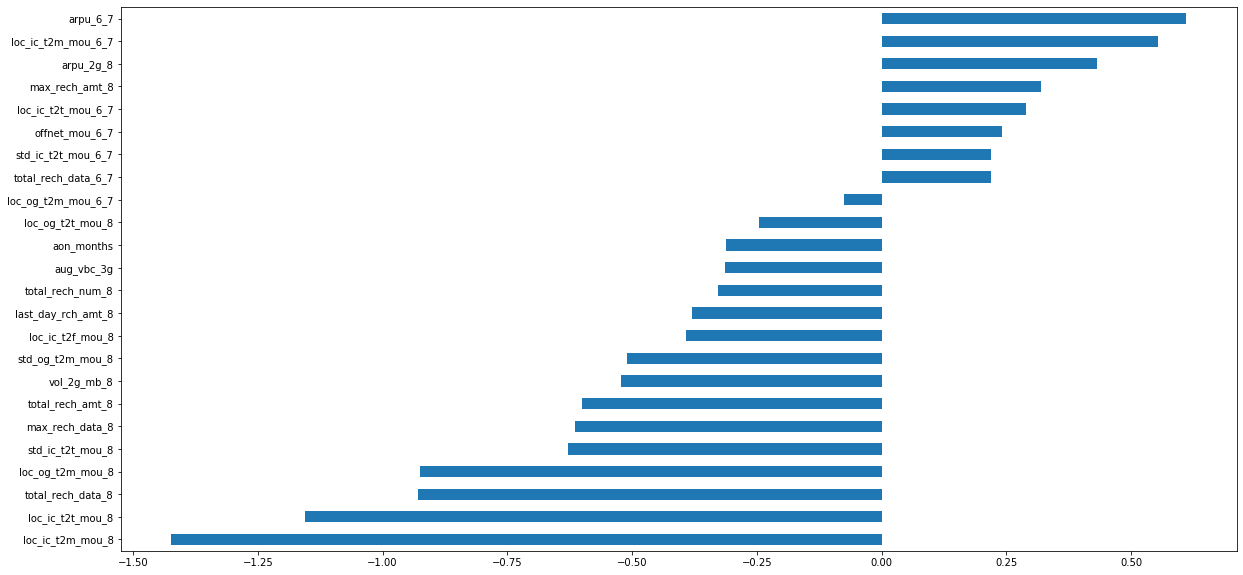

In [1097]:
plt.figure(figsize=(20,10))
weights = pd.Series(log_model.coef_[0],
                 index=X_train_new.columns.values)
weights.sort_values().plot(kind = 'barh')
plt.show()

### Coef" is  log odds ratio when each covariate is increased by 1 unit, while holding other covariates constant. coef_[0] is the sigma_estimates which provides the z-score for each model coefficient.

#### Taking the absolute value of co-efficients above, features will very low co-effients are<br>
### loc_og_t2m_mou_6_7
### total_rech_data_6_7
### std_ic_t2t_mou_6_7
### offnet_mou_6_7
### loc_og_t2t_mou_8
### loc_ic_t2t_mou_6_7
### aon_months
### aug_vbc_3g
### max_rech_amt_8
### total_rech_num_8
### last_day_rch_amt_8
### loc_ic_t2f_mou_8
### arpu_2g_8

#### These are strong predictors of the Churn.

<hr>

### Last Notes :-

### Attributes which are strong predictors of the Churn rate are as following -
loc_og_t2m_mou_6_7 - Average local outgoing to other operator mobile min of usage for month of June and July<br>
total_rech_data_6_7 - Average of Total Recharge Internet for month of June and July<br>
std_ic_t2t_mou_6_7 - Average local incoming min of usage for month of June and July<br>
offnet_mou_6_7 - Average calls outside operator network minutes of usage for month of June and July<br>
loc_og_t2t_mou_8<br>
loc_ic_t2t_mou_6_7<br>
aon_months<br>
aug_vbc_3g<br>
max_rech_amt_8<br>
total_rech_num_8<br>
last_day_rch_amt_8<br>
loc_ic_t2f_mou_8<br>
arpu_2g_8<br>

### There are 40 important components ( out of 226 attributes) in the data which covers 98 percent of total data variance. This is depicted in the Screeplot of PCA above.

### There are approx 30000 high value customers in the data which are using more than 70th percentile of the average recharge amount in the first two months (the good phase).

### Behaviour is 8th (August) Month is taken as the base of Churn Analysis.

### Churn rate of the High Value Customer is 8.1 percent. Very Less Amount of High Value customers are churning which is a good service indicator.

###  Age on network is months for which the customer is using the operator T network. It is found that there are very less customer who stay in one network for more than a 60 months (5 years).

### Churn rate is highest in customers who are new in network - using it for less than 20 months (less than 2 years)


###  Data for 'good’ phase - month of June and July are used to perform predictive analysis.


### People who have not recharged during the good phase are more likely to Churn.

### People with high difference between average revenue per user in Action phase (August month) and Good phase (average of June and July month) are more likely to churn.

### Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn

###  There is no visible difference in Volume Based Cost & Churn

###  Average local outgoing and Average of Total Recharge Internet in Good phase (June and July month) are strong predictor of Churn.

### Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn

### Behaviour of Volume Based Cost is not a strong indicator of Churn

### Max Recharge Amount could be a good Churn Indicator


### <font color ='blue'>Metrics for all the models we used are as below.<br> Considering the Sensitivity score, Logistic Regression model is the best model to predict the Churn as it has highest proportion of actual positives which are correctly identified. <br>The overall accuracy score is highest for the Random Forest model.</font>

<font color='Green'>
<h2>Logistic Regression</h2> <br>
The accuracy Score for logistic Regression is : 0.7865792689701144 <br>
Sensitivity Score for logistic Regression is: 0.8026666666666666 <br>
Specificity Score for logistic Regression is: 0.785116955520543 <br>
Precision Score for logistic Regression is: 0.2534736842105263 <br>
recall is 80.26 <br>
auc is 0.85245 <br>

## Decision Tree <br>
The accuracy Score for Decision Tree is : 0.8933451838684591 <br>
Sensitivity Score for Decision Tree is: 0.6893333333333334 <br>
Specificity Score for Decision Tree is: 0.9118894679432796 <br>
Precision Score for Decision Tree is: 0.41559485530546625 <br>
Recall is 68.933333 <br>
auc is 0.86148 <br>

## Random Forest <br>
The accuracy Score for Random Forest is : 0.9341184312854127 <br>
Sensitivity Score for Random Forest is: 0.6893333333333334 <br>
Specificity Score for Random Forest is: 0.9635195733850442 <br>
Precision Score for Random Forest is: 0.6034255599472991 <br>
Recall is 61.066667 <br>
auc is 0.90109</font>

<hr>